# Исследование факторов делающих компьютерную игру успешной

В нашем распоряжении данные о продажах игр (оценки пользователей и экспертов, жанры и платформы) за несколько лет, предоставленные отделом продаж интернет-магазина "Стримчик". Мы хотим выявить определяющие успешность игры закономерности, чтобы по данным предыдущего года ,научиться планировать рекламные кампании на будущий год.

**Цель исследования**<br>
Выявить и проанализировать факторы определяющие успешность игры.

**Практическая значимость**<br>
Результаты исследования можно использовать в подготовке и реализации рекламной кампании, сделав ставку по потенциально популярный продукт.

**Ход исследования**<br>
Данные о продажах игр, оценках пользователей и экспертов, жанрах, платформах берем из games.csv. О качестве данных ничего неизвестно, поэтому выполним детальный **обзор данных**.

Далее выполним **предобработку данных**, учитывая особенности (пропуски, ошибки, аномалии), которые обнаружили при обзоре. Исправим ошибки и аномалии, заполним пропуски (там где это уместно), удалим дубликаты, приведем типы данных к нужным. После всех исправлений добавим новый столбец с **суммарными продажами по каждому региону**.

Выполним **исследовательский анализ данных**. Выясним, сколько игр выпускалось в разные годы и как при этом менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим характерный срок появления новых и исчезновения старых платформ. Выберем *актуальный период*, на основании раннее полученных результатов. Оперируя данными этого периода выясним какие платформы лидируют по продажам, какие растут, какие падают. Выберем из них несколько потенциально прибыльных платформ. Выясним как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Посмотрим на общее распределение игр по жанрам. Сравним самые прибыльные жанры. 

Составим **портрет пользователя каждого региона**. <br>
Для кажлого из них определим самые популярные платформы (топ-5), самые популярные жанры (топ-5), различия в долях продаж. Выяним влияет ли рейтинг ESRB на продажи в отдельном регионе.

**Проверим две гипотезы:**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В конце по результатам исследования и проверки гипотез сделаем общий вывод и составим рекомендации по практическому применению результатов исследования.

Таким образом исследование пройдет 5 этапов:

1. Обзор данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Статистический анализ данных;
5. Результаты исследования и рекомендации по практическому применению.

## Обзор данных 

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import statistics as stat
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import warnings
from scipy import stats as st

In [2]:
try: 
    df_games = pd.read_csv('/datasets/games.csv') 
    display(df_games.head(30))

except: 
    df_games = pd.read_csv('games.csv')
    display(df_games.head(30))
 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Замечаем разный регистр в названии столбцов, "странный" формат даты в 'Year_of_Release', пропуски в 'Critic_Score', 'User_Score', 'Rating'. Ознакомимся подробнее с данными таблицы.

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк и 11 столбцов с типами данных: 'Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score' - float64, 'Name', 'Platform', 'Genre', 'User_Score', 'Rating' - object.
Согласно документации к данным: <br>
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

А вот и ответ на вопрос о "странном" формате даты в столбце 'Year_of_Release', столбец имеет тип float64. А столбец 'User_Score' с типом данных object содержит числовые значения и строковые! Будем иметь ввиду при изменении типов данных. Отдельно посчитаем количество пропусков в каждом столбце.

In [4]:
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Приличное количество. По два пропускав в 'Name' и 'Genre', 269 пропусков в 'Year_of_Release', 6701 в 'User_Score', 6766 в 'Rating' и 8578 в 'Critic_Score'. Стратегию обработки пропусков разработаем позже.<br>
Выведем информацию о максимальных, минимальных, среднем и отклонении.

In [5]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Интересно. Самая "древняя" игра, аж 1980 года! Последний год выпуска игры из данных - 2016. В штатах (ожидаемо) в среднем наибольшие продажи среди тройки Европа, Северная Америка, Япония. Продажи в других странах в сумме, в среднем превышают продажи в перечисленных трех регионах. 

Ознакомимся с количестовм уникальных значений по каждому столбцу.

In [6]:
for name in df_games.columns.tolist():
    print('Столбец', name)
    print(df_games[name].value_counts())
    print("Всего уникальных значений (включая пропущенные):", len(df_games[name].unique()))
    print()

Столбец Name
Need for Speed: Most Wanted       12
Ratatouille                        9
LEGO Marvel Super Heroes           9
FIFA 14                            9
Madden NFL 07                      9
                                  ..
My Street                          1
Grabbed by the Ghoulies            1
NES Open Tournament Golf           1
Mega Man Battle Chip Challenge     1
Dynasty Tactics 2                  1
Name: Name, Length: 11559, dtype: int64
Всего уникальных значений (включая пропущенные): 11560

Столбец Platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
Всего уникальных значений (включая 

Интересно, что название игр повторяются неоднократно, наверное игры выпущенные на разных платформах. 

Отметим что:
* пятерка самых популярных платформ: PS2, DS, PS3, Wii, X360; 
* чаще остальных встречаются игры выпущенные с 2002 по 2016 годы; 
* семерка популярных жанров: action, sports, misc, role-playing, shooter, adventure, racing, а всего жанров 12; 
* 8 типов рейтингов, среди которых сильно выделяются количеством E, T, M, E10+.

Согласно официальной документации ESRB (Entertainment Software Rating Board):

* E	- подходит для всех возрастных категорий;
* T - подходит для лиц старше 13 лет;
* M - подходит для лиц старше 17 лет;
* E10+ - подходит для лиц старше 10 лет;
* EC - подходит для детей от 3 лет;
* K-A - подходит для всех возрастных категорий (использовался до 1998 года);
* RP - категория ещё не присвоена;
* AO - подходит для взрослых старше 18 лет.

**ВЫВОДЫ**<br>
Выполнили первичное знакомство с данными. Стало понятно что именно делать в предобработке данных. В нашем распоряжении данные об играх выпущенных с 1980 по 2016 годы, данные о количестве продаж отдельно по Северной Америке, Европпе, Японии и остальным странам (все не вошедшие в предыдущие три группы), данные о рейтинге и жанрах. В ходе обзора было замечено:
1. Названия столбцов в разных регистрах;
2. Таблица содержит пропуски в столбцах 'Name', 'Genre', 'Year_of_Release', 'User_Score', 'Rating', 'Critic_Score';
3. Столбец 'Year_of_Release' содержит данные о дате в формате float64;
4. Данные в столбце User_Score типа object так как встречается оценка tdb, что согласно https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie может означать "To Be Determined", то есть "Будет определено". 
5. Получили первичную информацию об уникальных значениях столбцов. Имеем: 11559 различных игр, на 31 платформе, 12 жанров и 8 рейтингов. 


## Предобработка данных

### Переименование столбцов

Переименуем столбцы, приведем названия к "змеиному стилю"

In [7]:
df_games.columns = df_games.columns.str.lower()
df_games.sample(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5173,Super Fire ProWrestling Special,SNES,1994.0,Fighting,0.00,0.00,0.36,0.00,NaN,NaN,NaN
8276,Pictionary,DS,2010.0,Puzzle,0.09,0.06,0.00,0.02,NaN,tbd,E
2942,Mortal Kombat: Shaolin Monks,PS2,2005.0,Action,0.58,0.02,0.00,0.09,77.0,8.6,M
12018,John Madden Football,SNES,1991.0,Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN
11319,S.C.A.R.S,PS,1998.0,Racing,0.05,0.03,0.00,0.01,NaN,NaN,NaN
12650,Syndicate,PC,1992.0,Strategy,0.00,0.05,0.00,0.01,NaN,NaN,NaN
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E
6378,I Spy: Spooky Mansion,Wii,2010.0,Puzzle,0.25,0.00,0.00,0.02,NaN,tbd,E
15221,Rule of Rose,PS2,2006.0,Action,0.01,0.01,0.00,0.00,59.0,8.6,M
6227,Warpath: Jurassic Park,PS,1998.0,Fighting,0.15,0.10,0.00,0.02,NaN,NaN,NaN


Готово.

### Изменение типов данных

В ходе обзора данных мы заметили, что есть несколько столбцов, типы данных которых, не соотвествуют содержанию.<br> 'year_of_release' - содержит год выхода компьтерных игр, при этом имеет формат float64. Так как он содержит только год выхода, мы не будем преобразовывать его в datetime64 (нет необходимости обрабатывать время, дату и месяц), а приведем к int64. 

In [8]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Обработка значений tbd и изменение типа данных столбца user_score

user_score - имеет тип данных object, хотя содержит оценки пользователей. В ходе обзора мы выяснили, что помимо числовых оценок (согласно документации максимальное значение 10) он содержит 2424 записи с оценкой tbd. Предварительное предположение tbd - "To Be Determined", то есть "Будет определено". 

In [9]:
df_games[df_games['user_score'] == 'tbd'].sort_values('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12833,Elemental Gearbolt,PS,1997,Shooter,0.03,0.02,0.0,0.00,76.0,tbd,T
3028,Pro Pinball: Big Race USA,PS,1999,Simulation,0.37,0.25,0.0,0.04,69.0,tbd,E
2234,SnoCross Championship Racing,PS,1999,Racing,0.52,0.35,0.0,0.06,66.0,tbd,E
10226,Breakout,PS,1999,Puzzle,0.06,0.04,0.0,0.01,NaN,tbd,E
4223,Razor Freestyle Scooter,PS,1999,Sports,0.26,0.17,0.0,0.03,65.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
15292,Steal Princess,DS,<NA>,Platform,0.02,0.00,0.0,0.00,60.0,tbd,E10+
15966,Dinotopia: The Sunstone Odyssey,GC,<NA>,Action,0.01,0.00,0.0,0.00,50.0,tbd,T
16017,Dream Dancer,DS,<NA>,Misc,0.01,0.00,0.0,0.00,NaN,tbd,E
16288,Shorts,DS,<NA>,Platform,0.01,0.00,0.0,0.00,NaN,tbd,E10+


Была мысль, что такая оценка может быть связана с тем, что игра вышла совсем недавно и еще не успела получить достаточное количество отзывов, но нет, мы видим игры выходившие и в 1997, и в 1999. Значит разницы между пропуском в этом столбце и записью типа tbd никакой нет. И это означает, что пропусков в этом столбце почти 55%. Заменим tbd на NaN и приведем к типу float64

In [10]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.NaN)
df_games['user_score'] = df_games['user_score'].astype('float64')
df_games.info()
df_games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим сколько строк, в которых пропуски/tbd в столбце 'user_score' и при этом одновременно пропуск в 'critic_score'

In [11]:
df_games[(df_games['user_score'].isnull() == True) & (df_games['critic_score'].isnull() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


8005! И с этими строками видимо уже ничего не сделать. Да впрочем как и с остальными. Для отдельных игр (все зависит от целевого региона продаж) может и не существовать рейтинга критиков и (или) пользователей и рейтинг ESRB (рейтинг США, Мексики и Канады), или для новых игр он попросту еще может быть не сформирован. В любом случае, замена значений на средние, медиану общую или по определенным группам, приведет к искажению результатов исследования рейтинга. Удаление этих строк - к искажению результатов исследования остальных параметров. Поэтому никаких замен выполнять не будем.   

### Пропуски в столбце name


По дате выхода и/или рейтингу и остальным доступным параметрам мы никак не сможем установить название игры. Поэтому смело удаляем две строки с пропусками в этом столбце.

In [12]:
df_games.dropna(subset=['name'], inplace=True)
df_games.reset_index(inplace=True, drop=True)

Готово.

### Пропуски в year_of_release

Ознакмимся подрбнее с пропусками в year_of_release

In [13]:
df_years = df_games[df_games['year_of_release'].isna() == True]
display(df_years['name'].value_counts().head(10))

LEGO Harry Potter: Years 5-7             7
Happy Feet Two                           4
Rock Band                                4
Test Drive Unlimited 2                   3
Bejeweled 3                              3
WRC: FIA World Rally Championship        3
Backbreaker                              2
Robert Ludlum's The Bourne Conspiracy    2
Rock Revolution                          2
All-Star Baseball 2005                   2
Name: name, dtype: int64

Строки с абсолютно разным содержанием, что по платформам, что по годам в названии. 

Учитывая бесполезность данных об игре без года выпуска этой игры (для изучения параметров игр актуального периода), и небольшое количество пропусков (примерно 1.6%) смело удаляем строки с пропусками.

In [14]:
df_games.dropna(subset=['year_of_release'], inplace=True)
df_games.reset_index(inplace=True, drop=True)
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Готово.

### Пропуски в critic_score и rating

In [15]:
print('Пропусков в critic_score:', df_games['critic_score'].isna().sum())
print('Пропусков в rating:', df_games['rating'].isna().sum())

Пропусков в critic_score: 8461
Пропусков в rating: 6676


Можно конечно посчитать корреляцию с critic_score с user_score или со столбцами, содрежащими данные о продаже, но ее наличие не может гарантировать прямую (обратную) связь между рассматриваемыми параметрами.

In [16]:
corr_1 = df_games['critic_score'].corr(df_games['user_score'])
corr_2 = df_games['critic_score'].corr(df_games['na_sales'])
corr_3 = df_games['critic_score'].corr(df_games['other_sales'])

print('C user_score:', corr_1)
print('С na_sales:', corr_2)
print('C other_sales:', corr_3)

C user_score: 0.5796706281932219
С na_sales: 0.24008320620582407
C other_sales: 0.19841044547410314


Поэтому оставим пропуски как есть.<br>
Для замены пропусков в rating есть возможность обратиться к рейтингу выбранной игры, выпущенной на другой платформе.

In [17]:
name_rating = df_games.set_index("name")['rating'].dropna().to_dict()
#print(name_rating)  # словарь "Название игры - Рейтинг"

def rat(st): 
    if pd.isna(st['rating']):
        return name_rating.get(st['name'])
    return st['rating']

df_games['rating'] = df_games.apply(rat, axis=1)
print(df_games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6259
dtype: int64


439 строк удалось заполнить. 

In [18]:
df_rating = df_games[(df_games['rating'].isnull() == True) & (df_games['na_sales'] == 0)]
df_rating[df_rating['na_sales'] == 0].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
214,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,None
339,Friend Collection,DS,2009,Misc,0.0,0.00,3.67,0.00,NaN,NaN,None
383,Monster Hunter 4,3DS,2013,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,None
401,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.0,0.99,2.32,0.02,NaN,NaN,None
426,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,None
526,Dragon Quest V: Tenkuu no Hanayome,SNES,1992,Role-Playing,0.0,0.00,2.78,0.01,NaN,NaN,None
559,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.0,0.00,2.68,0.00,NaN,NaN,None
570,Super Mario Bros.: The Lost Levels,NES,1986,Platform,0.0,0.00,2.65,0.00,NaN,NaN,None
626,Final Fantasy V,SNES,1992,Role-Playing,0.0,0.00,2.43,0.02,NaN,NaN,None
666,Dragon Warrior Monsters,GB,1998,Role-Playing,0.0,0.00,2.34,0.01,NaN,NaN,None


Согласно https://dic.academic.ru/dic.nsf/ruwiki/140779 *рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры. Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки. Большинство игровых издательств в США пользуются рейтинговой системой ESRB.* Значит не все пользуются этой рейтинговой системой. Отсюда и пропуски. А учитывая что игра могла и вовсе не продаваться в Северной Америке, так и тем более.

Заменим пропуски в столбце `rating` на 'other', для того чтобы в последствии учитывать при исследование отсутствие рейтинга ESBR у игры.

In [19]:
df_games['rating'] = df_games['rating'].fillna('other')
print(df_games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


### Дубликаты

Проверим датафрейм на наличие явных дубликатов. Перед этим переведем в нижний регистр данные типа object 

In [20]:
df_list = ['name', 'platform', 'genre', 'rating']

for val in df_list:
    df_games[val] = df_games[val].str.lower()

In [21]:
df_games.duplicated().sum()

0

Явных дубликатов нет

### Суммарные продажи во всех регионах

Добавим в датафрейм столбец `sales`, в котором запишем суммы столбцов na_sales,	eu_sales, jp_sales, other_sales.

In [22]:
df_games['sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,other,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,other,31.38


Готово.

**ВЫВОДЫ**

В ходе предобработки данных мы выполнили:
1. Переименование столбцов;
2. Изменение типов данных в `year_of_release` на Int64;
3. Заменили на NaN значение tdb столбца `user_score` так как заметили, что оно встречается не только играх выпущенных в последнее время (было предположение, что игру просто не успели оценить пользователи, так как во многих истониках TBD - "To Be Determined", "Будет Определено");
4. Пропуски в столбцах `user_score`, `critic_score`, оставили без изменений, так как адекватную, неискажающую результаты исследования замену не нашли;
5. Строки с пропусками в столбце `name` удалили (2 строки);
6. Пропуски в столбце `year_of_release` оставили без изменений;
7. Для заполнения пропусков в столбце `rating` обратились к рейтингу игр на других платформах. 439 строк (чуть более 6%);
8. Дубликатов не обнаружили;
9. Добавили столбец `sales` с сумарными продажами игры по всем регионам.


## Исследовательский анализ данных

Выполним исследовательский анализ данных

### Распределение количества выпущенных игр по годам

Создадим сводную таблицу, в которой отобразим количество игр выпущенных по годам

In [23]:
count_games = df_games.pivot_table(index='year_of_release', aggfunc={'name':'count'})
count_games.columns = ['games_on_year']
count_games.sort_values('games_on_year', ascending=False).head(10)


,games_on_year
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


Сразу замечаем, что в топ 10 по количеству выпущенных игр попадают года с 2002 - 2010 и наибольшее количество в 2008, далее 2009 и 2010 (по убыванию) и далее спад. Объяснить спад после 2009 года можно мировым финансовым кризисом с одной стороны, и развитием игровой индустрии мобильных устройств (2008 год выходит iphone и appstore, что становится мощным катализатором развития мобильной игровой индустрии), а также набирающая обороты индустрия сетевых игр. 

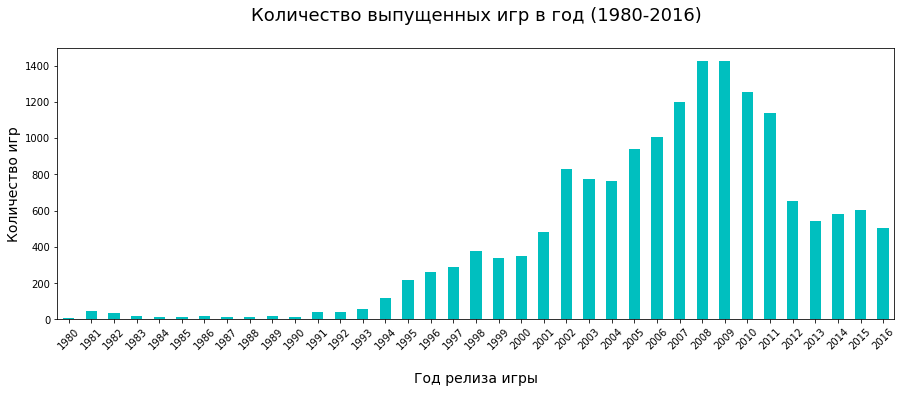

In [24]:
count_games.plot(y='games_on_year', kind='bar', figsize=(15, 5), legend=False, color='c')

plt.title(label='Количество выпущенных игр в год (1980-2016)\n', fontsize=18)
plt.xlabel("\nГод релиза игры", fontsize=14)
plt.ylabel("Количество игр", fontsize=14)
plt.xticks(rotation = 45)
plt.show()

По графику замечаем, что первый скачек продаж был в 1981 году, в этом году вышел первый в мире журнал полностью посвященный видеоиграм "Electronic Games". Nintendo выпустила аркадную игру Donkey Kong, которая стала хитом аркадных платформенных игр. А благодаря выходу в прошлом году красочного и привлекательного Pac-Man аудитория аркадных игр в 1981 году стала намного шире. 

Второй скачек в 1994 году, в котором кассовыми стали такие игры как Super Street Fighter II из аркадных, Donkey Kong Country (Super Donkey Kong), Final Fantasy VI, Mortal Kombat II из числа домашних видеоигр.  В 1995 возможный скачек продаж может быть вызван появлением домашней консоли Sony PlayStation в декабре 1994 в Японии и в сентябре 1995 в Америке и Европе. 

Третий скачек в 2002 году. В этом году вышли многие сиквелы к уже ставшими популярными играми, среди которых можно выделить Final Fantasy XI, Grand Theft Auto: Vice City,Virtua Fighter 4, Super Mario Sunshine и многие другие. Из новых игр хочется выделить Battlefield и Mafia! На пике популярности вышли такие платформы как Nintendo GameCube, Microsoft Xbox, Sony PlayStation, Nintendo Game Boy Advance и осбоенно Sony PlayStation 2.

Четвертый скачек (но на этот раз вниз) в 2012 году. "Падение продаж видеоигр объясняется тем, что потребители стали чаще покупать игры для мобильных устройств, а также играть через социальные сети, например Facebook", отмечает NPD Group. Ссылка на статью https://www.gazeta.ru/business/2012/04/13/4344821.shtml. 

,games_on_year
year_of_release,
2008,1039
2009,1001
2010,900
2007,884
2011,779
2006,773
2005,657
2002,631
2004,550


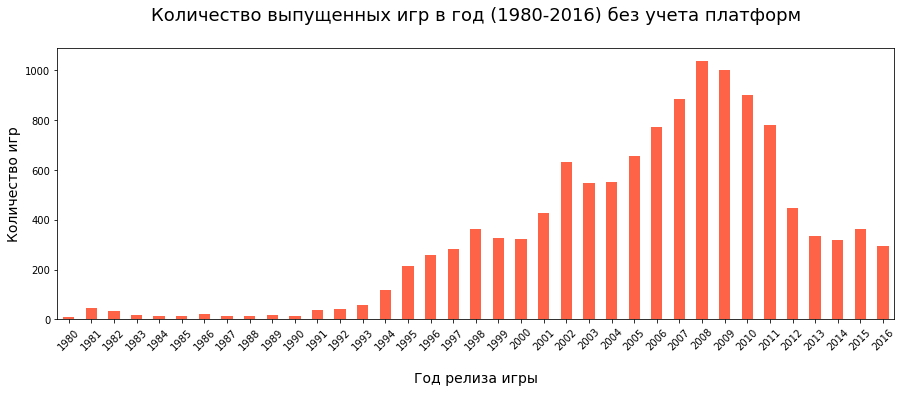

In [25]:
count_uniq_games = df_games.pivot_table(index='year_of_release', values='name', aggfunc='nunique')
count_uniq_games.columns = ['games_on_year']
display(count_uniq_games.sort_values('games_on_year', ascending=False).head(10))


count_uniq_games.plot(y='games_on_year', kind='bar', figsize=(15, 5), legend=False, color='tomato')

plt.title(label='Количество выпущенных игр в год (1980-2016) без учета платформ\n', fontsize=18)
plt.xlabel("\nГод релиза игры", fontsize=14)
plt.ylabel("Количество игр", fontsize=14)
plt.xticks(rotation = 45)
plt.show()


Так как теперь одна и таже игра, вышедшая на разных платформах, учитывается только один раз, то количество релизов в год сократилось. Причем стоит заметить, что в рейтинге "Количество релизов в год" 2003 и 2004 годы поменялись местами (в предыдущем варианте 2003 г. - 775 релизов, 2004 г. - 762 релизов, а теперь 2004 г. - 556 релизов, 2003 г.- 550 релизов). Хотя глобально тенденции такие же как и на ранее построенном.

### Анализ продаж по платформам

Получим таблицу платформы - продажи, и отсортируем по убыванию продаж

In [26]:
plf = df_games.groupby('platform')['sales'].sum().sort_values(ascending=False).reset_index() # платформы по продажам
plf.head(10)

,platform,sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


Вот они лидеры **ps2, x360, ps3, wii, ds, ps**.

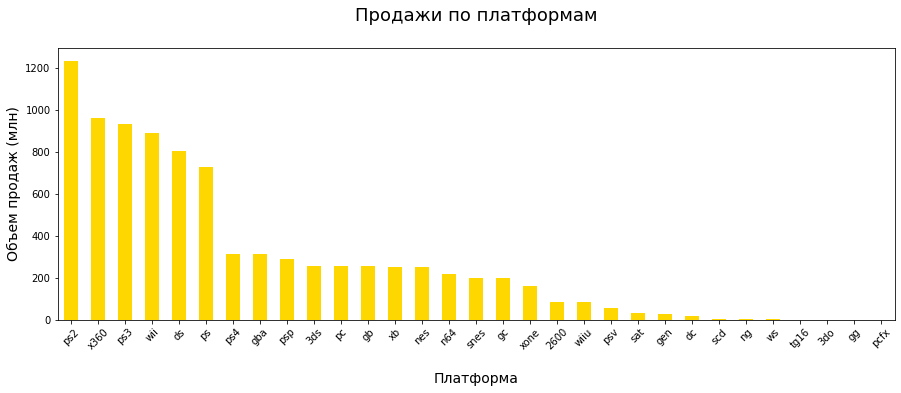

In [27]:
plf.plot(x='platform', y='sales', kind='bar', figsize=(15, 5), legend=False, color='gold')

plt.title(label='Продажи по платформам\n', fontsize=18)
plt.xlabel("\nПлатформа", fontsize=14)
plt.ylabel("Объем продаж (млн)", fontsize=14)
plt.xticks(rotation = 45)
plt.show()

На диаграмме выше хорошо заметно, что у первых 6 платформ продажи в два и более раз превосходят продажи остальных, а продажи последних 10 (особенно последних 7) несоизмеримо меньше всех остальных. PS2 конечно абсолютный лидер. PS4 во второй группе рейтинга так как еще молодая платформа (в сравнении конечно же) и так как появилась в эпоху доминирования видеоигр на смартфонах и по сети.

Для общего ознакомления выведем все платформы в одной системе координат. По оси x - годы релиза игр, по оси y - продажи по платформам в мире в млн.

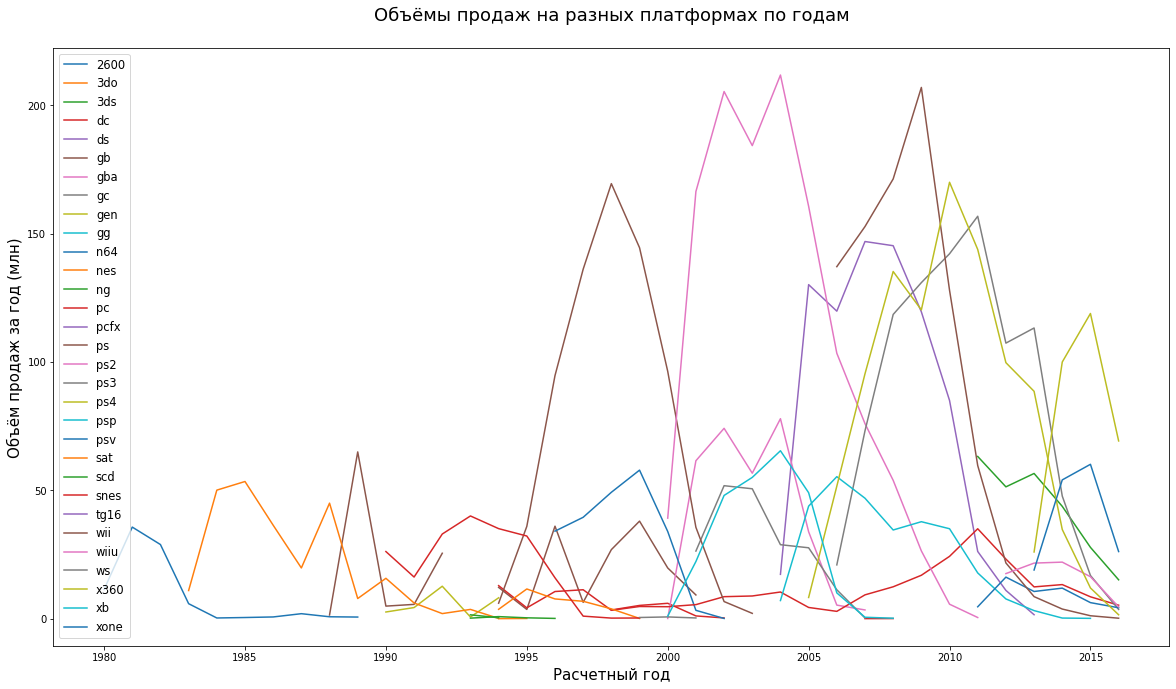

In [28]:

popular_df = df_games.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
popular_df.plot(figsize=(20,11))
plt.legend(fontsize=11.5)
plt.title('Объёмы продаж на разных платформах по годам\n', fontsize=18)
plt.xlabel('Расчетный год', fontsize=15)    
plt.ylabel('Объём продаж за год (млн)', fontsize=15)
plt.show()


Не сильно информативно, но можно заметить что для всех платформ срок их "жизни" ограничен и примерно составляет от 5 до 23 лет, распределения продаж по каждой отдельной платформе в большинстве своем близки к нормальным, можно выделить платформы с уровнем продаж почти вдвое превосходящим остальные (ps всех серий кроме 4, x360, wii, ds), а одна платформа самая "долгоиграющая" хотя и с не самыми выдающимися продажами (конечно же речь о pc).

**Отберем топ 10 платформ по продажам.**

In [29]:
top_plf = plf.loc[:9] # топ 10 платформ по продажам
top_plf 

,platform,sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


Готово. Теперь построим график аналогичный предыдущему, но для топ-10

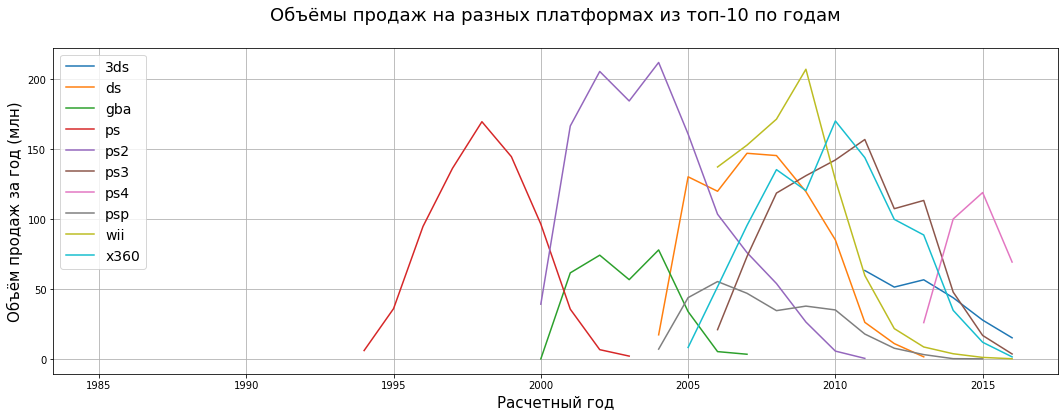

In [30]:
pop = df_games.groupby('platform').sum()['sales'].sort_values(ascending=False).index.values[:10]

popular_df = df_games[df_games.platform.isin(pop)]
popular_df = popular_df.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
popular_df.plot(figsize=(18,6))
plt.grid()
plt.title('Объёмы продаж на разных платформах из топ-10 по годам\n', fontsize=18)
plt.xlabel('Расчетный год', fontsize=15)    
plt.ylabel('Объём продаж за год (млн)', fontsize=15)
plt.legend(fontsize=14)
plt.show()

С топ-10 куда информатичнее! Вот они те самые лидеры продаж, вот их распределения близкие к нормальным, вот и продолжительность "жизни" около 7 - 10 лет, если не считать pc.

In [31]:
life_plf = popular_df.T.fillna(0).reset_index() # в таблице с топ-10 платформами заменяем пропски в продажах по годам на 0 и транспонируем
life_plf.set_index('platform', inplace=True) # 'platform' делаем столбцом индексов
life_plf = life_plf[life_plf != 0].count(axis=1) # получаем Series с количеством лет (считаем просто количество ненулевых столбцов)
life_plf = life_plf[life_plf.index != 'pc'] # убираем строку с 'pc' (существует с 70ых) и в данном наборе является выбросом
print('Характерный срок, за который появляются новые и исчезают старые платформы:', round(life_plf.mean(), 1), 'лет')

Характерный срок, за который появляются новые и исчезают старые платформы: 9.7 лет


И график и рассчет показывают, что среднее время жизни топ-10 (по количеству продаж) платформ составляет чуть менее **10** лет (персональные компьютеры не считаем, они были есть и будут)

### Исследование игр в срезе актуального периода для прогноза на 2017 год

Характерный срок появления новых и исчезновения старых платформ составил около 11 лет. Учитывая, что за это время платформа проходит условно три стадии:<br>
1. Набирает популярность (наблюдается рост продаж);
2. На пике популярности (продажи в некотором приемлемом, высоком диапазоне);
3. Спад популярности (продажи падают);

привильно будет взять треть периода жизни платформы, около 3 - 4  лет для получения прогноза на 2017. Значит актуальным периодом будем считать данные за 2013, 2014, 2015, 2016 годы. Возьмем срез данных за этот период.

In [32]:
df_forecast = df_games[df_games['year_of_release'] >= 2013] # указанный срез 

Изобразим на графике объемы продаж на топ-10 платформах по годам с 2013 по 2016.

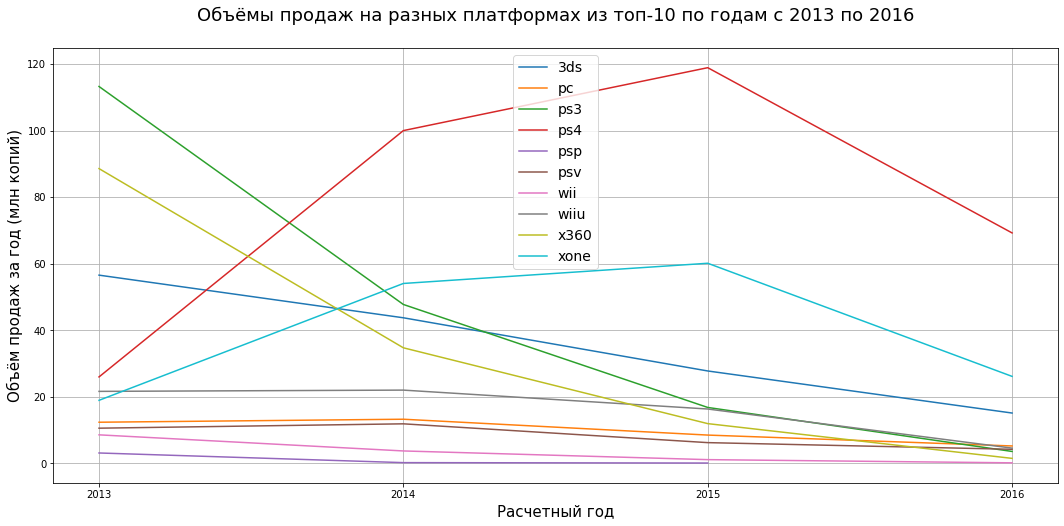

In [33]:
pop = df_forecast.groupby('platform').sum()['sales'].sort_values(ascending=False).index.values[:10]

pop_17 = df_forecast[df_forecast.platform.isin(pop)]
pop_17 = pop_17.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
pop_17.plot(figsize=(18,8))
plt.grid()
plt.title('Объёмы продаж на разных платформах из топ-10 по годам с 2013 по 2016\n', fontsize=18)
plt.xlabel('Расчетный год', fontsize=15)    
plt.ylabel('Объём продаж за год (млн копий)', fontsize=15)
plt.legend(fontsize=14)
plt.xticks(range(2013, 2017, 1))
plt.show()

In [34]:
plat13 = df_forecast.groupby('platform').sum()['sales'].sort_values(ascending=False).index

plat13 = df_forecast[df_forecast.platform.isin(plat13)]

plat13 = plat13.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
plat13

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Из таблицы видим, что нет ни одной платформы, продажи которой росли, или даже оставались примерно на одном уровне с 2013 по 2016 годы. DS и PSP так вовсе прекратили свое существование. X360 и wii в 2016 году падение продаж почти в 10 раз если сравнивать с 2015 годом, PS3 в 5 раз. Менее остальных "просели" 3DS, PC, PS4, PSV, Wiiu, Xone.  

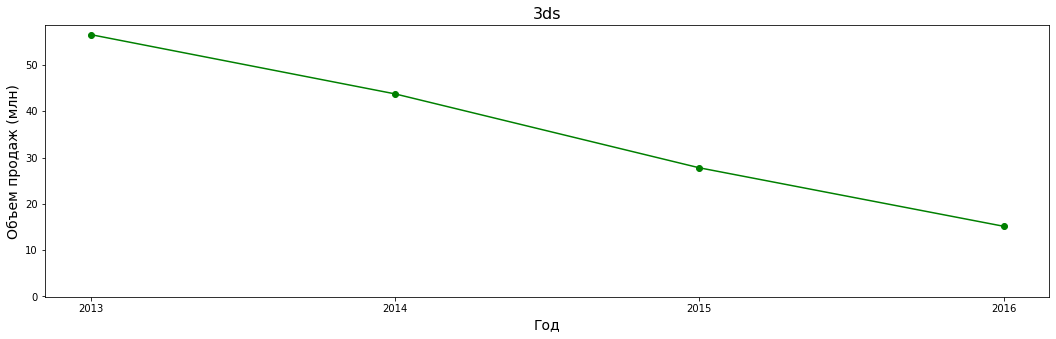

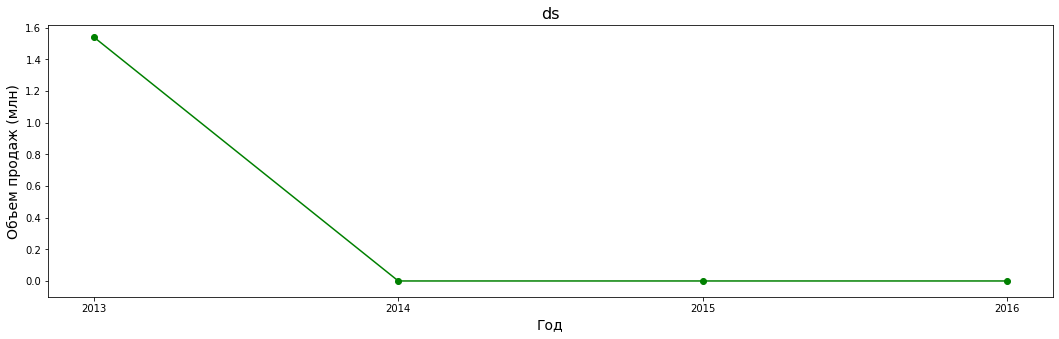

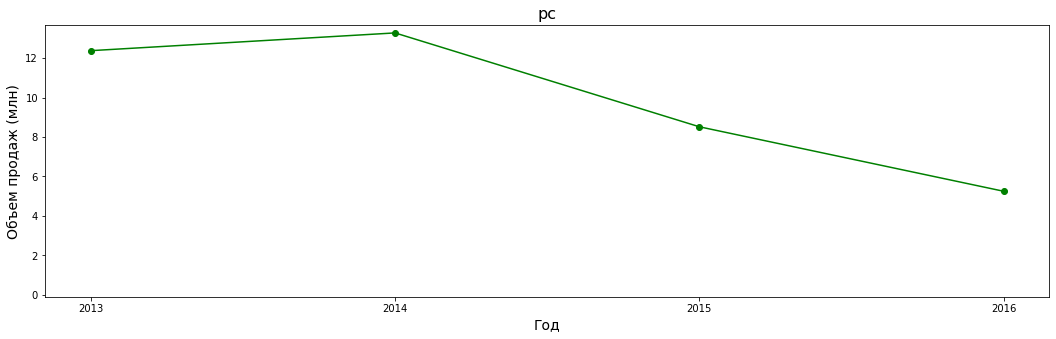

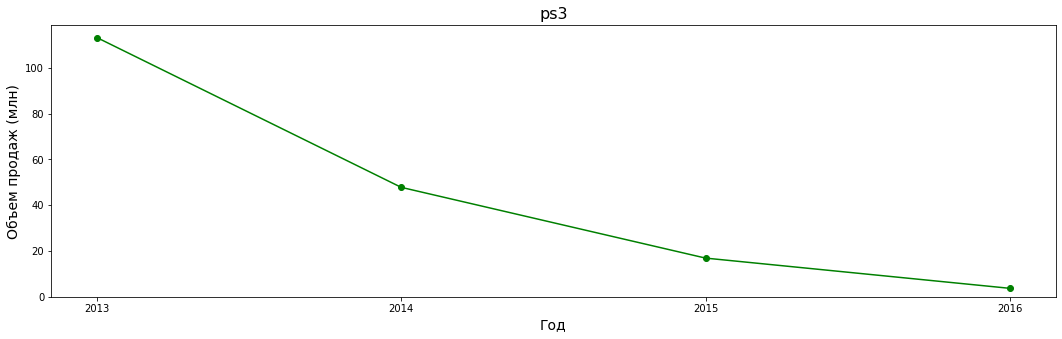

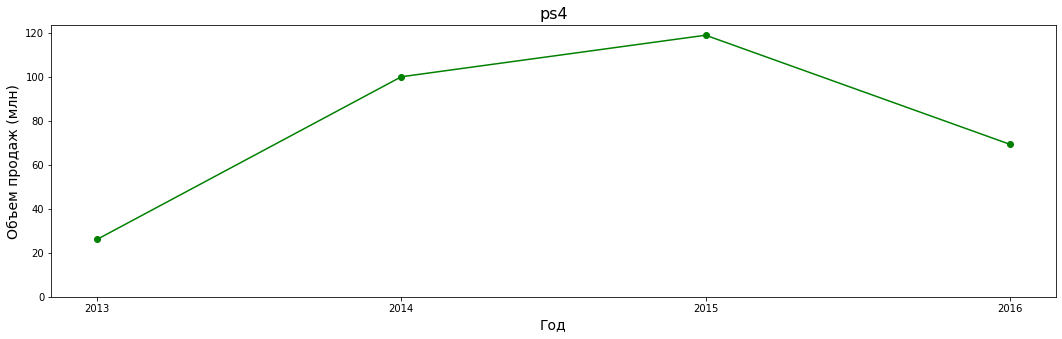

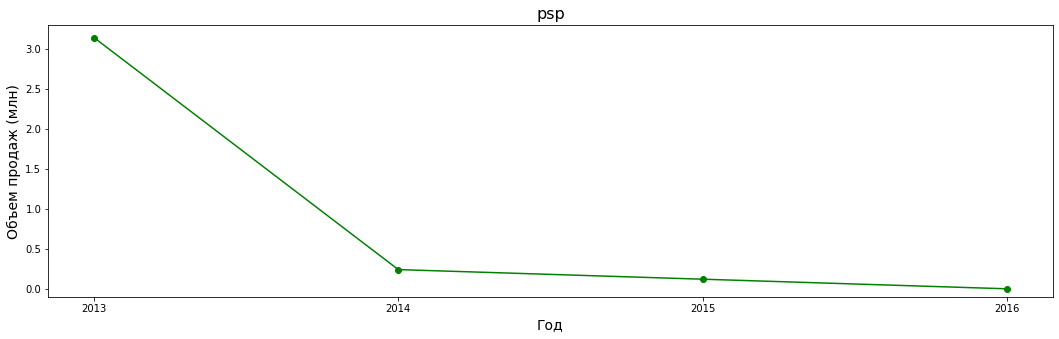

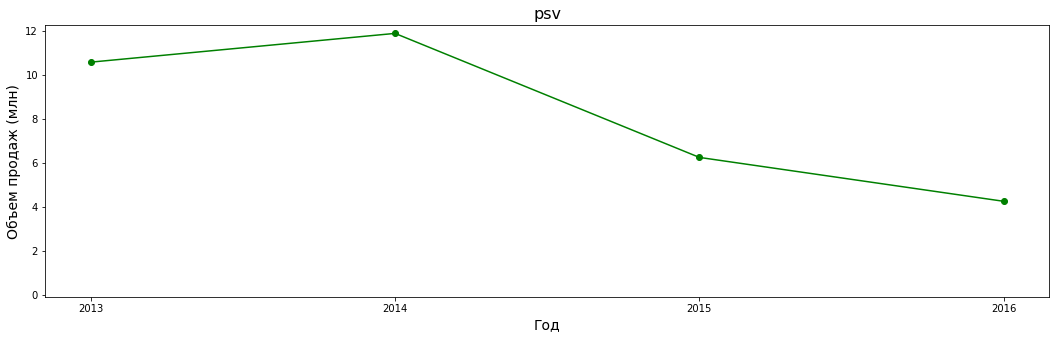

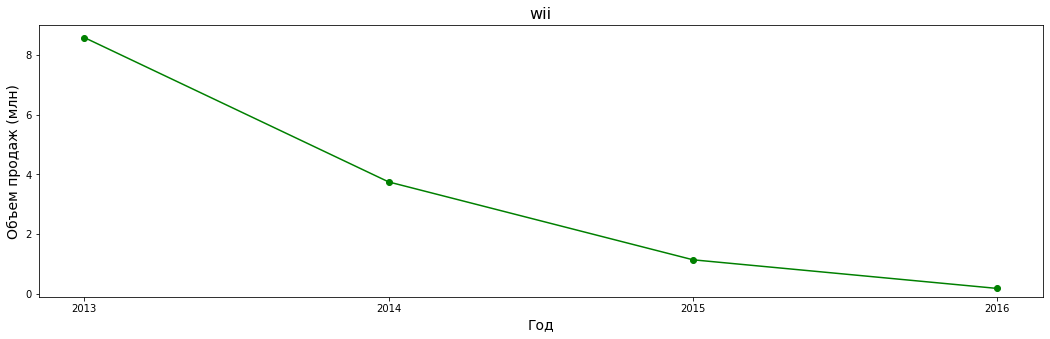

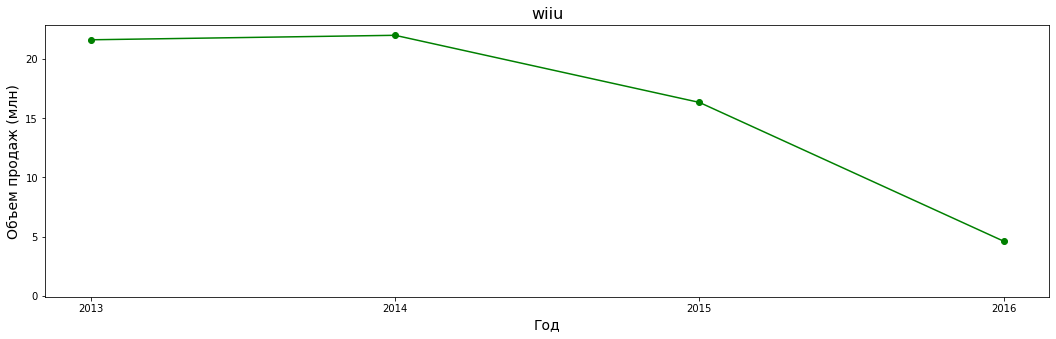

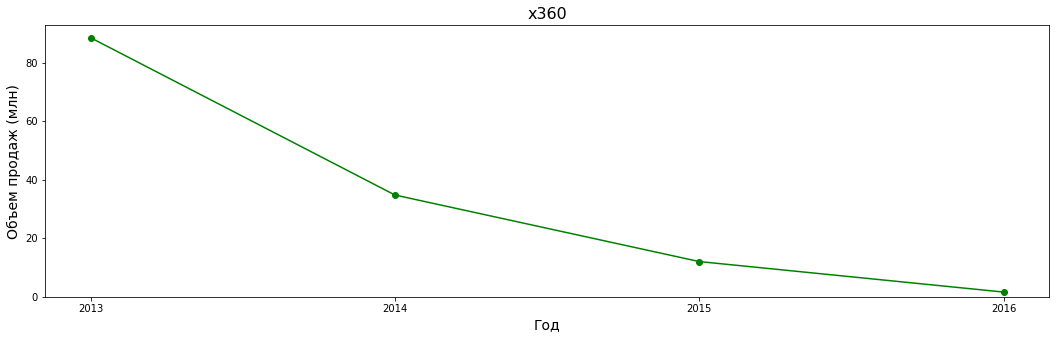

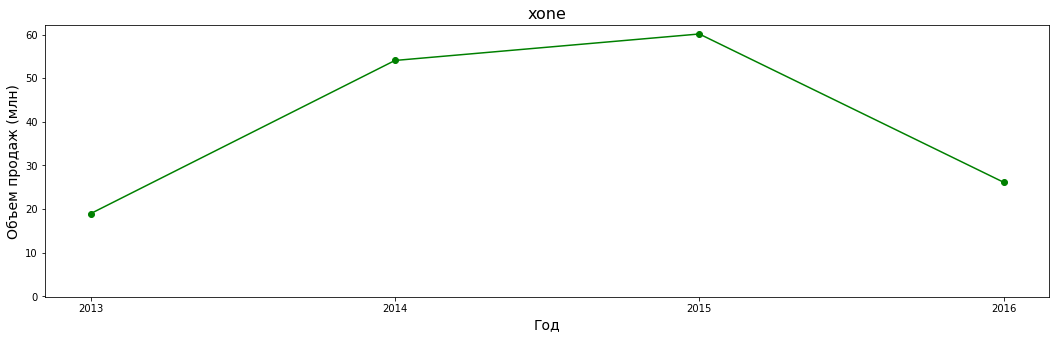

In [35]:
plat13 = plat13.fillna(0)
col = plat13.columns
for value in col:
    ax = plt.gca()
    plat13[value].plot(x='year_of_release', marker="o", kind='line', ax=ax, figsize=(18, 5), color='green')
    plt.xticks(range(2013, 2017, 1))
    plt.title(value, fontsize=16)
    plt.ylabel('Объем продаж (млн)', fontsize=14)
    plt.xlabel('Год', fontsize=14)
    plt.ylim(-0.1)
    plt.show()


Из этого и предыдущего графиков делаем вывод, что за 2015 - 2016 годы роста по количеству продаж нет ни у одной платформы. У всех платформ наблюдается спад продаж к 2016 году. Разница лишь в том, что продажи у одних упали до 0 (psp, wii), у других нет и у ps4 и xone c 2013 -2015 наблюдался рост.

Учитывая, что характерный "срок жизни" платформы примерно 10 лет, можем заметить, что **потенциально прибыльными  платформами** стоит считать те, чей "жизненный цикл" еще не преодолел 10 лет и они имеют ненулевые продажи в каждый из 2013 -2016 годы. Это **3ds, ps4, xone, wiiu, psv, pc**. PC включаем так как эта платформа самая долговечная (если не просто вечная) имеет стабильные продажи хоть и невысокие, PS4 и Хone еще "в полном боевом строю" и показывают лучшие продажи среди остальных платформ.


**Построим диаграмму размаха для глобальных продаж игр в разбивке по платформам**

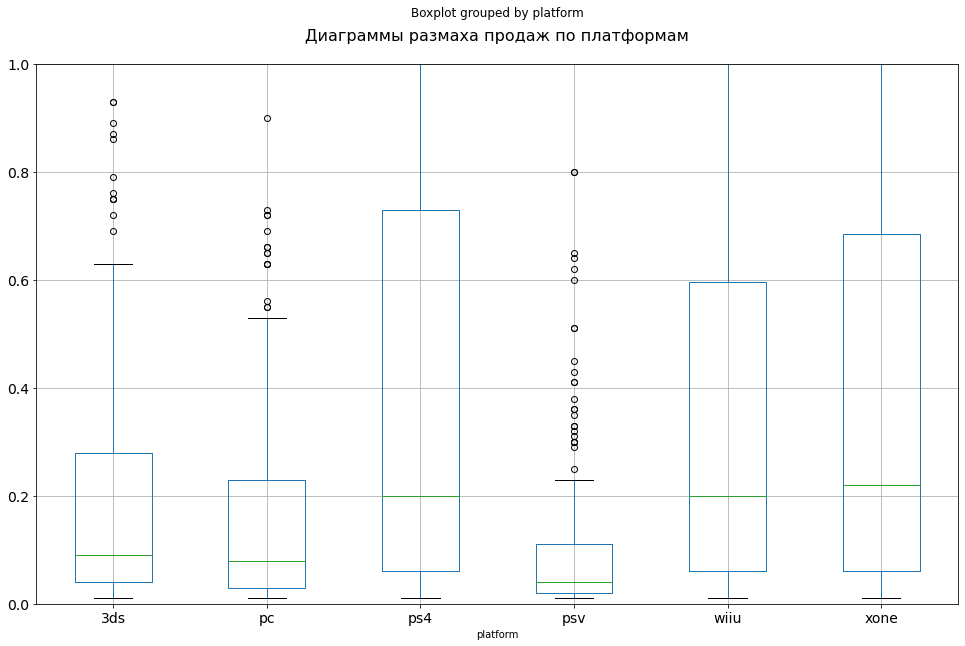

In [36]:
profit = ['3ds', 'ps4', 'xone', 'wiiu', 'psv', 'pc']
box_df_top = df_forecast[df_forecast['platform'].isin(profit)]
box_df_top.boxplot(by='platform', column='sales', figsize=(16,10), fontsize=14)
plt.ylim(0,1)
plt.title('Диаграммы размаха продаж по платформам\n', fontsize=16)
plt.show()


По данным представленным на диаграммах размаха и таблицах выше, замечаем, что значение медины продаж у 3ds, pc, psv не превосходят 0.1 млн, в то время как ps4 и wiiu имеют медиану на уровне 0.2 млн, а xone даже выше 0.2

По всем диаграммам размаха можно сказать, что они имеют распределение с отклонением вправо (положительное). Количество значений превосходящих среднее арифметическое больше остальных значений


In [37]:
box_df_top[['platform', 'sales', 'year_of_release', 'name']].sort_values('sales', ascending=False)
display(box_df_top.groupby('platform')['sales'].median())

box_df_top.groupby('platform')['sales'].describe()

platform
3ds     0.09
pc      0.08
ps4     0.20
psv     0.04
wiiu    0.20
xone    0.22
Name: sales, dtype: float64

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
pc,189.0,0.208624,0.352304,0.01,0.03,0.08,0.230,3.05
ps4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
psv,358.0,0.092151,0.153816,0.01,0.02,0.04,0.110,1.96
wiiu,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
xone,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


In [38]:
box_d = df_games[df_games['year_of_release'] >= 2013].groupby('platform')['sales'].sum().sort_values(ascending=False)
box_d

platform
ps4     314.14
ps3     181.43
xone    159.32
3ds     143.25
x360    136.80
wiiu     64.63
pc       39.43
psv      32.99
wii      13.66
psp       3.50
ds        1.54
Name: sales, dtype: float64

**ВЫВОД**

* Мы рассмотрели на гистограмме количество игр выпущенных по годам с 1980 по 2016. Заметили, что до 1994 года выходило менее 100 игр в год. Начиная с 1995 года этот показатель превысил отметку в 200 игр в год и далее рос до 1998 года (уже 379 игр), затем был небольшой спад, скачок в 2002 (831 игра) и снова небольшой спад к 2003 году. Далее уверенный рост до 2008, 2009 годов (на 2008 год приходится максимум по количетву выпущенных игр - 1427). Затем плавный (2010, 2011) и далее резкий в 2012 году (652 игры) спад и примерно одинаковый уровень вплоть до 2016 года. К 2016 году вышли примерно на уровень 2001 года по количеству выпущенных игр.
* Рассмотрели гистограмму количество игр выпущенных по годам с 1980 по 2016 без учета платформы, на которой она была выпущена. Тенденции те же, что и ранее, но есть "перестановки" по отдельным годам.
* Выявили абсолютных лидеров по продажам среди платформ за все время. В топ-10 вошли: ps2, x360, ps3, wii, ds, ps, gba, ps4, psp, pc. 	
* Из графиков "Объем продаж на разных платформах по годам", "Объем продаж на разных платформах из топ-10 по годам" и соотвествующих расчетов определили, что характерный срок, за который появляются новые и исчезают старые платформы равен чуть менее 10 лет (9.7 лет).
* Исходя из выше перечисленного, сделали вывод, что для постороения прогноза на 2017 год, актуальными для исследования будут данные за 2013 - 2016 годы.
* Рассмотрев продажи по платформам с 2013 по 2016 год заметили, что потенциально прибыльными можно считать 3ds, ps4, xone, wiiu, psv, pc.
* На диаграммах размаха (объем продаж по платформам за указанный период) заметили, что значение медины продаж у 3ds, pc, psv не превосходят 0.1 млн, в то время как ps4 и wiiu имеют медиану на уровне 0.2 млн, а xone даже выше 0.2 А также, что распределение продаж по платформам имеет отклонение вправо (положительное). И предпочтительнее других все те же ps4, xone и далее xone, wiiu.

### Влияние отзывов критиков и пользователей на продажи внутри одной из популярных платформ

Рассмотрим одну из популярных платформ, а именно ps4 и корреляцию между отзывами пользоватлей/критиков и объемом продаж

In [39]:
ps4 = df_games.query('platform=="ps4"')[['name',  'critic_score', 'user_score', 'sales', 'year_of_release']] \
                    .dropna().reset_index(drop=True)
ps4.sort_values('sales', ascending=False).head(20)

,name,critic_score,user_score,sales,year_of_release
0,grand theft auto v,97.0,8.3,12.62,2014
1,fifa 16,82.0,4.3,8.58,2015
2,call of duty: advanced warfare,83.0,5.7,7.66,2014
3,fifa 17,85.0,5.0,7.60,2016
4,fallout 4,87.0,6.5,7.17,2015
5,fifa 15,82.0,5.7,6.08,2014
6,destiny,76.0,6.1,5.64,2014
7,uncharted 4: a thief's end,93.0,7.9,5.39,2016
8,uncharted: the nathan drake collection,86.0,8.1,4.62,2015
9,call of duty: infinite warfare,77.0,3.4,4.47,2016


In [40]:
print('Корреляция между объемом продаж и отзывовами критиков =' , ps4['sales'].corr(ps4['critic_score']).round(2))
print('Корреляция между объемом продаж и отзывовами пользователей =' , ps4['sales'].corr(ps4['user_score']).round(2))

Корреляция между объемом продаж и отзывовами критиков = 0.41
Корреляция между объемом продаж и отзывовами пользователей = -0.03


Очень интересные результаты. Корреляция между critic_score и sales 0.41 - слабая. Но в целом положительная около 0.5 достаточно реалистично. Корредяция же между user_sales и sales напротив является отрицательной около -0.03 - очень слабая. И значит зависимости между величинами нет. Значит и у игр с плохими продажами присутствуют в том числе высокие пользовательские отзывы.

In [41]:
ps4.sort_values('sales').head(50)

,name,critic_score,user_score,sales,year_of_release
248,carmageddon: max damage,51.0,5.5,0.01,2016
240,prototype: biohazard bundle,48.0,2.0,0.01,2016
241,mark mcmorris infinite air,49.0,6.0,0.01,2016
243,super stardust ultra vr,66.0,6.2,0.01,2016
247,dungeons 2,61.0,7.9,0.01,2016
244,super dungeon bros,42.0,2.3,0.01,2016
245,sherlock holmes: the devil's daughter,70.0,6.8,0.01,2016
246,root letter,69.0,7.5,0.01,2016
228,the talos principle,88.0,8.4,0.02,2015
229,dead rising 2,82.0,6.6,0.02,2016


Вот тому подтверждение. нередкими являются оценки пользователей от 7 до 8.5 для игра с продажами от 0.01 до 0.05 млн. <br>
Рассмотрим подробнее зависимости на соотвествующих диаграммах рассеивания.

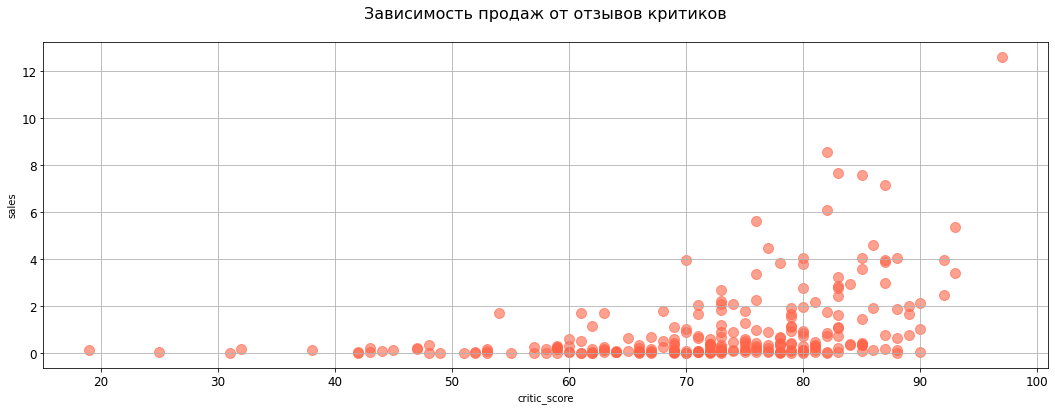

In [42]:
ps4.plot(x='critic_score',y='sales',s=100, kind='scatter',figsize=(18,6), alpha=0.6, color = 'tomato', fontsize=12)
plt.title('Зависимость продаж от отзывов критиков\n', fontsize=16)
plt.grid()
plt.show()

Из диаграммы видим, что, действительно, наибольшие продажи, у игр с высокой оценкой критиков. Однако не так игр с оценкой выше 90 единицы, соотвественно как и тех что превышают 6 млн по продажам (учитывая, что те немногие, с продажами больше 6 млн. имеют рейтинг от 80-90, и лишь одна 90-100).

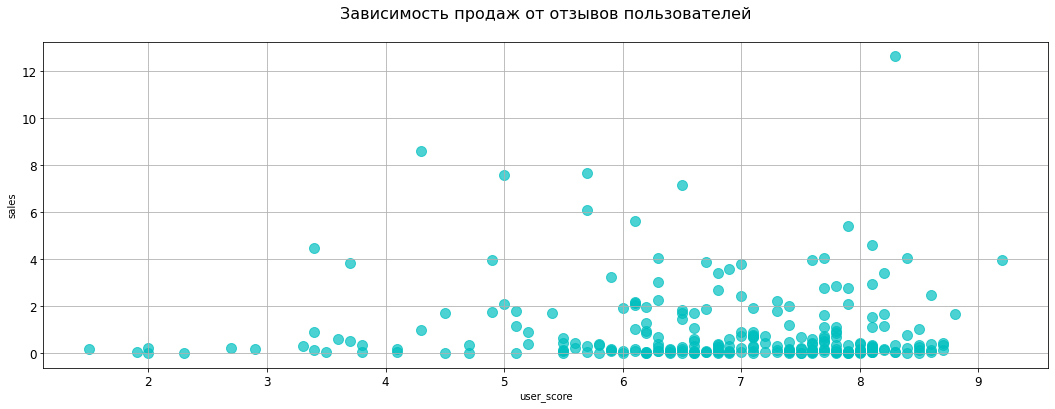

In [43]:
ps4.plot(x='user_score',y='sales', s=100, kind='scatter',figsize=(18,6), alpha=0.7, color = 'c', fontsize=12)
plt.title('Зависимость продаж от отзывов пользователей\n', fontsize=16)
plt.grid()
plt.show()

Из диаграммы видим, что с ростом оценки пользователей продажи игры не спешат расти. Да есть один выброс с рейтингом 8-9 и продажами более 12 млн., но остальные игры с продажами больше 2 млн имеют рейтинг пользователей от 3.5-9.5.

### Влияние оценок критиков и пользователей на продажи среди наиболее популярных платформ 

Построим диаграммы рассеяния для 7 наиболее популярных платформ (наибольшее количество продаж с 2013 - 2016 годы) на одном графике, и построим как коррелируют продажи с отзывами критиков/пользователей.

In [44]:
top_13 = df_games[df_games['year_of_release'] >= 2013].groupby('platform')['sales'].sum().sort_values(ascending=False)

top_list = pd.DataFrame(top_13).reset_index()['platform'].to_list()[0:7] # список с топ-7 платформ по продажам за 2013-2016 годы

sal_scor = {} # словарь топ платформа - продажи, оценки критиков, оценки пользователей
for p in top_list:
    sal_scor[p] = df_games.query('platform == @p')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

Создадим соотвествующую таблицу корреляций

In [45]:
i=0
corr7 = pd.DataFrame(columns=['platform','critic','user']) 
# таблица корреляций продажи по платформам с оценками критиков и пользователей
for pl_name in sal_scor.keys():
    corr7.loc[i, 'platform'] = pl_name
    corr7.loc[i, 'critic'] = sal_scor[pl_name]['sales'].corr(sal_scor[pl_name]['critic_score'])
    corr7.loc[i, 'user'] = sal_scor[pl_name]['sales'].corr(sal_scor[pl_name]['user_score'])
    i+=1

corr7

,platform,critic,user
0,ps4,0.405895,-0.033625
1,ps3,0.428213,0.143978
2,xone,0.410422,-0.094003
3,3ds,0.338904,0.232089
4,x360,0.388992,0.11028
5,wiiu,0.350882,0.391848
6,pc,0.257261,0.003596


Готово.

Построим диаграмму рассеяния (продажи от оценки критиков за период 2013-2016 годы) для топ-7 платформ. 

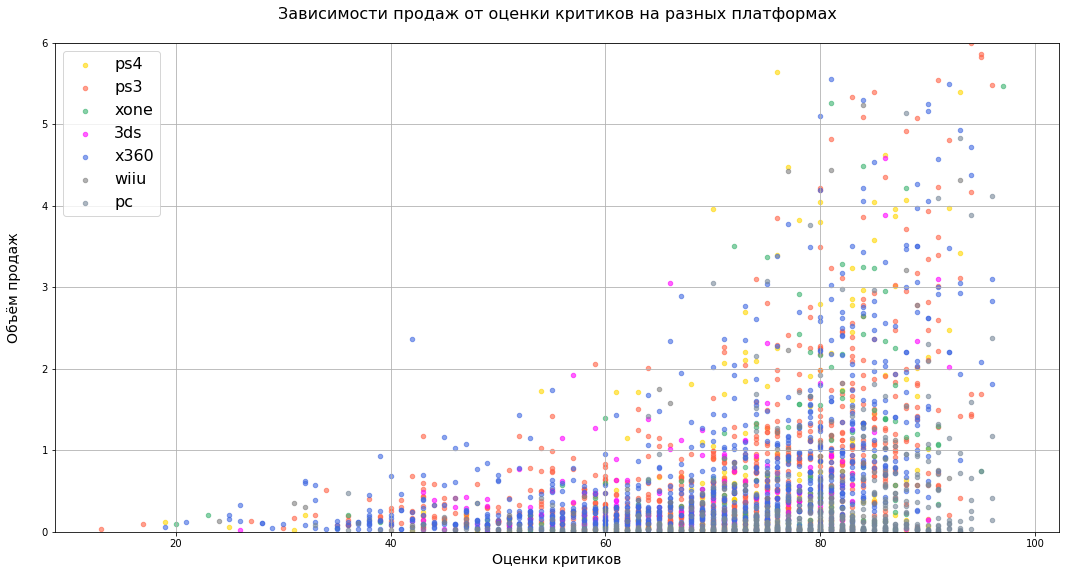

In [46]:
color_list = ['gold', 'tomato', 'mediumseagreen', 'magenta', 'royalblue', 'grey', 'lightslategrey']
plt.figure(figsize=(18, 9))
plt.grid()
plt.title('Зависимости продаж от оценки критиков на разных платформах\n', fontsize=16)
i=0
for p in corr7['platform']:
    xc = sal_scor[p]['critic_score'].to_list()
    yc = sal_scor[p]['sales'].to_list()
    plt.scatter(xc, yc, label=p, color=color_list[i], alpha=0.6, s = 20);
    i+=1 
plt.ylim(0,6)
plt.grid(True)
plt.xlabel('Оценки критиков', fontsize=14)    
plt.ylabel('Объём продаж\n', fontsize=14)
plt.legend(fontsize=16)
plt.show()

Как видно из диаграммы рассеяния продажи по топ-7 платформам зависят от оценки критиков и в целом имеют очень схожее распределение. Зависимость прямая с явным ростом продаж при росте отзывов критиков. Заметим, что в срезе топ-7 платформ эта зависимость выражена более ярко.

Построим диаграмму рассеяния (продажи от оценки пользователей за период 2013-2016 годы) для топ-7 платформ.

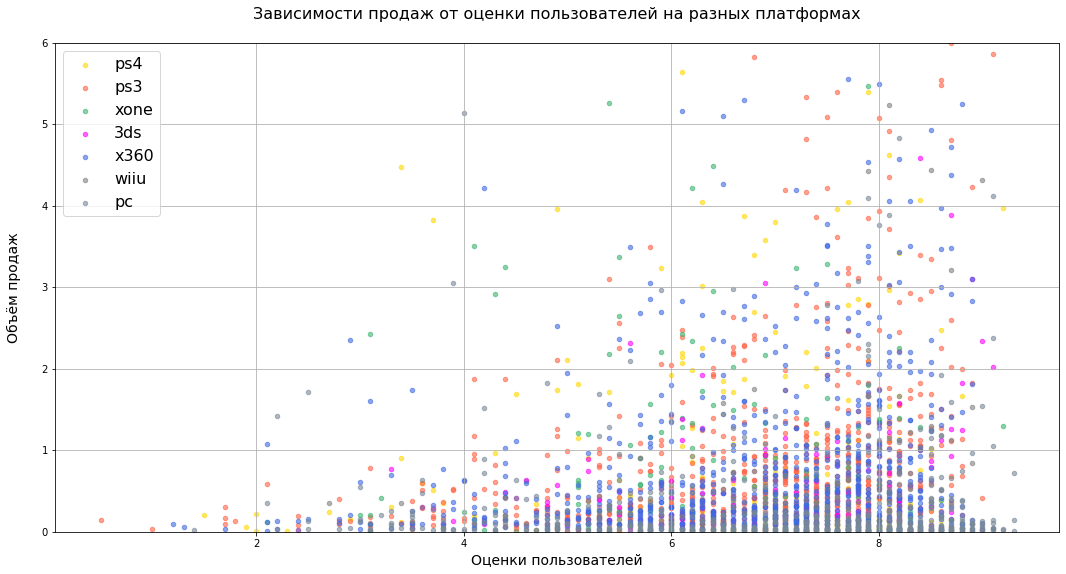

In [47]:
color_list = ['gold', 'tomato', 'mediumseagreen', 'magenta', 'royalblue', 'grey', 'lightslategrey']
plt.figure(figsize=(18, 9))
plt.grid()
plt.title('Зависимости продаж от оценки пользователей на разных платформах\n', fontsize=16)
i=0
for p in corr7['platform']:
    xc = sal_scor[p]['user_score'].to_list()
    yc = sal_scor[p]['sales'].to_list()
    plt.scatter(xc, yc, label=p, color=color_list[i], alpha=0.6, s = 20);
    i+=1 
plt.ylim(0,6)
plt.grid(True)
plt.xlabel('Оценки пользователей', fontsize=14)    
plt.ylabel('Объём продаж\n', fontsize=14)
plt.legend(fontsize=16)
plt.show()

Сразу замечаем, что в отличае от одной платформы (ps4) зависимость продаж от оценки пользователей в срезе топ-7 платформ более выражена. Но все равно зависимость очень слабая. И мы видим большое количество игр с высоким объемом продаж, но низким рейтингом.

**ВЫВОД**

Рассмотрели влияние отзывов критиков и пользователей на продажи ps4 как одной из самых популярных в 2013 - 2016 годах платформы. Заметили:
* Наибольшие продажи у игр с высокими оценками критиков. 
* Оценки пользователей на продажи не влияют, и среди игр, которые продаются посредственно, немало игр с высокими оценками пользователей.

Рассмотрели влияние оценок критиков и пользователей на продажи среди топ-7 популярных платформ. Заметили:
* Продажи среди топ-7 популярных в 2013 - 2016 годах платформ зависят от оценок критиков, чем выше оценка тем выше продажи.
* Оценки пользователей слабо влияют на продажи среди топ-7 платформ. Есть как хорошо продающиеся игры с высокими оценками, так и с низкими.

### Распределение игр по жанрам

In [48]:
genre_count = df_forecast.groupby('genre')['genre'].count().sort_values(ascending=False)
genre_count = pd.DataFrame(genre_count)
genre_count.columns = ['count']
genre_count.reset_index(level=0, inplace=True) 
display('Распределение жанров по количеству игр', genre_count)


'Распределение жанров по количеству игр'

,genre,count
0,action,766
1,role-playing,292
2,adventure,245
3,sports,214
4,shooter,187
5,misc,155
6,racing,85
7,fighting,80
8,platform,74
9,simulation,62


Видим, что за период с 2013 по 2016 годы в топ-5 (по количеству игр в этом жанре) оказались жанры action, role-playing, adventure, sports и shooter. Последнее место у puzzle, причем отставание от предыдущего более чем в 3 раза.

In [49]:
genre_sales = df_forecast.groupby('genre')['sales'].sum().sort_values(ascending=False)
genre_sales = pd.DataFrame(genre_sales)
genre_sales.columns = ['sales']
genre_sales.reset_index(level=0, inplace=True) 
display('Распределение жанров по количеству продаж', genre_sales)

'Распределение жанров по количеству продаж'

,genre,sales
0,action,321.87
1,shooter,232.98
2,sports,150.65
3,role-playing,145.89
4,misc,62.82
5,platform,42.63
6,racing,39.89
7,fighting,35.31
8,adventure,23.64
9,simulation,21.76


Топ-5 по продажам action, shooter, sports, role-playing, misc и platform. Хорошо продаются и чаще других выходят игры жанров action, shooter, sports, role-playing. Несмотря на то, что игр в жанре adventure с 2013 по 2016 год вышло не мало (3 место в топ-5), продажи у них весьма посредственные (на 9 месте в топ-12).

Заменяем названия последних двух жанров на `other`, чтобы потом сгрупиировать, просуммировать и отобразить на круговой диаграмме как один жанр, находящийся внизу рейтинга. Помним, что это жанры srategy и puzzle.

In [50]:
genre_count.loc[(genre_count['genre'] == 'strategy') | (genre_count['genre'] == 'puzzle'), 'genre'] = 'other'

genre_sales.loc[(genre_sales['genre'] == 'strategy') | (genre_sales['genre'] == 'puzzle'), 'genre'] = 'other'

Рассмотрим на круговых диаграммах распределение жанров по количеству выпущенных игр с 2013 по 2016 годы, и распределение жанров по объемам продаж 

In [51]:
genre= genre_count.groupby('genre')['count'].sum()
genre

genre
action          766
adventure       245
fighting         80
misc            155
other            73
platform         74
racing           85
role-playing    292
shooter         187
simulation       62
sports          214
Name: count, dtype: int64

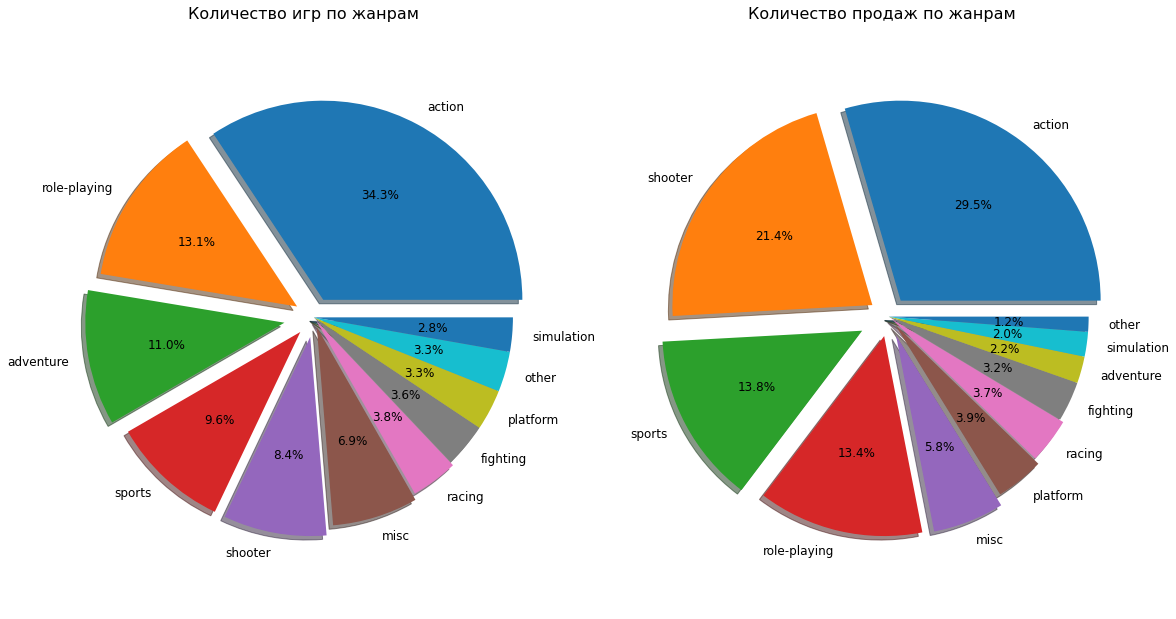

In [52]:
genre = genre_count.groupby('genre')['count'].sum().sort_values(ascending=False)
genre_s = genre_sales.groupby('genre')['sales'].sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 12))
fig.autofmt_xdate();

labels1 = genre.index
sizes1 = genre.values

labels2 = genre_s.index
sizes2 = genre_s.values
explode = (0.1, 0.1, 0.15, 0.1, 0.1, 0.05, 0.02, 0, 0, 0, 0)
ax1.set_title('Количество игр по жанрам', fontsize=16)
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0, textprops={'fontsize': 12})  

ax1.axis('equal')

ax2.set_title('Количество продаж по жанрам', fontsize=16)
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0, textprops={'fontsize': 12}) 
ax2.axis('equal')

plt.show()

# fig.autofmt_xdate();

Получили две информативные круговые диаграммы для распределения жанров по количеству выпущенных игр и по количеству продаж.

На груговой диаграмме слева видно что по количеству выпущенных игр жанр action занимает около трети от всего количества выпущенных с 2013 по 2016 годы игр. Количество игр жанра role-playing и adventure вместе взятых составляет примерно четверть о числа всех игр указанного периода. Остальные жанры вместе составляют чуть больше трети от числа всех.

На круговой диаграмме справа замечаем, что чуть больше четверти всех продаж приходится на жанр action, и на жанр shooter, четверть на sports и role-playing вместе и четверть на оставшиеся misc, platform, racing, fighting.

Заметим так же, что жанры fighting и racing занимают последние места как по количеству выпущенных игр так и по продажам. А жанр shooter несмотря на то, что в по количеству выпущенных игр в рейтинге находится на 5 месте, в рейтинге продаж занимает второе место, а жанр adventure находящийся на третьем месте в рейтинге "по количеству" вообще отсутствует в рейтинге "по продажам". С жанром platform с точность наоборот, в топ-8 по продажам есть, в топ-8 по количеству выпущенных игр нет.

In [53]:
mean_sales = df_forecast.groupby('genre')['sales'].median().sort_values(ascending=False)
mean_sales

genre
shooter         0.450
sports          0.240
platform        0.225
role-playing    0.125
fighting        0.125
racing          0.120
action          0.110
simulation      0.100
misc            0.100
strategy        0.080
puzzle          0.060
adventure       0.030
Name: sales, dtype: float64

Рассмотрев медианные продажи по жанрам, замечаем интересное - самый популярный по сумме продаж жанр action лишь на 7 месте. Значит есть выброс в виде некой популярной игры (GTA 5 скорее всего), который искажает данные. Выходит, что попадание этого жанра в топ-3, скорее исключчение из правил, нежели закономерность. А вот shooter и sports по прежнему в топе. Значит на них можно делать "ставку".

**ВЫВОД**

Рассмотрели распределение игр по жанрам в период с 2013 по 2016 годы. 
* В топ-5, по количеству выпущенных игр в этом жанре, попали action, role-playing, adventure, sports и shooter. 
* В топ-5 по продажам попали action, shooter, sports, role-playing, misc. Однако рассмотрев медианные продажи по жанрам, стоит скорректировать вывод, так как action там оказался лишь на 7 месте c медианой по продажам почти в 4 раза меньше чем у shooter и почти в два раза меньше чем у sports.   
* Жанр action лидер в обоих топах, тогда как игры в жанре shooter выходят в сравнительно небольшом количестве (5 место всего лишь), но продаются хорошо (второе место) и лидируют в топе по медианам продаж.
* Жанр adventure наоборот, десятая часть вышедших игр приходится на него, а вот в продажах лишь пятидесятая часть и по медианной продаже на последнем месте.



## Портрет пользователя каждого региона

Составим портреты пользоватя каждого региона - NA (Северная Америка), EU (Европа), JP (Япония). 

### Топ-5 популярных платформ

Создадим словарь топ-5 платформ по прадажам в NA, EU, JP

In [54]:
top_na = df_forecast.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5) #убрав head(5) легко 
top_eu = df_forecast.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5) # получим полный список
top_jp = df_forecast.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5) # рейтинга платформ региона
print('Топ-5 популярных платформ NA\n', top_na.index.to_list(), '\n')
print('Топ-5 популярных платформ EU\n', top_eu.index.to_list(), '\n')
print('Топ-5 популярных платформ JP\n', top_jp.index.to_list(), '\n')

Топ-5 популярных платформ NA
 ['ps4', 'xone', 'x360', 'ps3', '3ds'] 

Топ-5 популярных платформ EU
 ['ps4', 'ps3', 'xone', 'x360', '3ds'] 

Топ-5 популярных платформ JP
 ['3ds', 'ps3', 'psv', 'ps4', 'wiiu'] 



Готово. <br>
Видим, что в топ-5 NA и EU на первом месте `ps4`, в JP - портативная платформа `3ds` (в NA и JP она на последнем месте). В NA и EU в топ-5 присутствует x360 в JP ее нет, в свою очередь в JP  есть wiiu, а в NA и EU ее нет. psv тоже только в JP. C x360 понятно: "Зачем нам детище Microsoft, когда есть свое от Sony".

Отобразим на круговой диаграмме распределение продаж по платформам в каждом из указанных регионов.

In [55]:
all_plat_na = df_forecast.groupby('platform')['na_sales'].sum().sort_values(ascending=False) # Series платформа-продажи
all_plat_eu = df_forecast.groupby('platform')['eu_sales'].sum().sort_values(ascending=False) 
all_plat_jp = df_forecast.groupby('platform')['jp_sales'].sum().sort_values(ascending=False) 

all_plat_na = pd.DataFrame(all_plat_na)
all_plat_na.reset_index(level=0, inplace=True) # обернули в датафрей для дальнейшего перобразования значений столбца

all_plat_eu = pd.DataFrame(all_plat_eu)
all_plat_eu.reset_index(level=0, inplace=True)

all_plat_jp = pd.DataFrame(all_plat_jp)
all_plat_jp.reset_index(level=0, inplace=True)

all_plat_na.loc[all_plat_na['platform']
                .isin(['psv', 'ds', 'psp']), 'platform'] = 'other' # заменили название платформ из tail списка на other
all_plat_eu.loc[all_plat_eu['platform']
                .isin(['psv', 'wii', 'ds', 'psp']), 'platform'] = 'other'
all_plat_jp.loc[all_plat_jp['platform']
                .isin(['x360', 'xone', 'wii', 'ds', 'pc']), 'platform'] = 'other'

na = all_plat_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False) #  создали соотвествующие series
eu = all_plat_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp = all_plat_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

print(na, eu, jp)

platform
ps4      108.74
xone      93.12
x360      81.66
ps3       63.50
3ds       38.20
wiiu      29.21
pc        11.11
wii        6.56
other      5.61
Name: na_sales, dtype: float64 platform
ps4      141.09
ps3       67.81
xone      51.59
x360      42.52
3ds       30.96
pc        25.36
wiiu      19.85
other     13.05
Name: eu_sales, dtype: float64 platform
3ds      67.81
ps3      23.35
psv      18.59
ps4      15.96
wiiu     10.88
psp       3.29
other     0.90
Name: jp_sales, dtype: float64


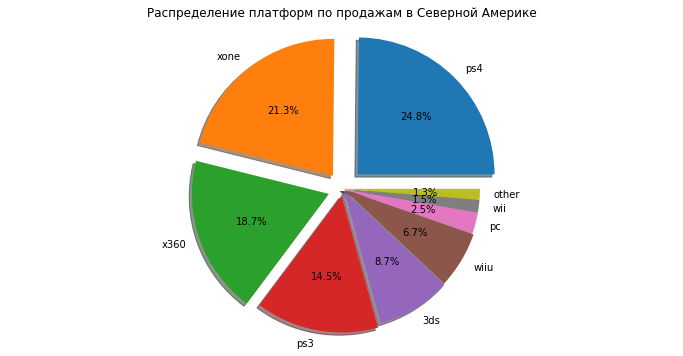

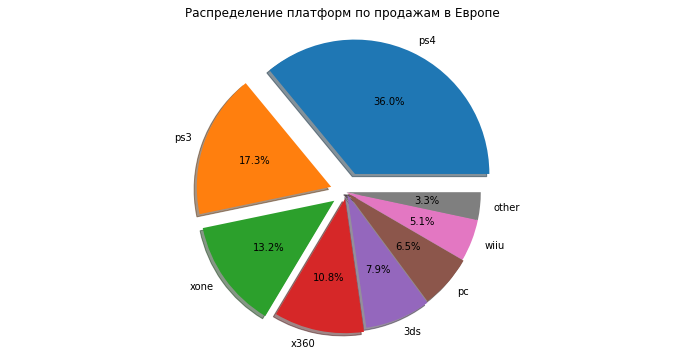

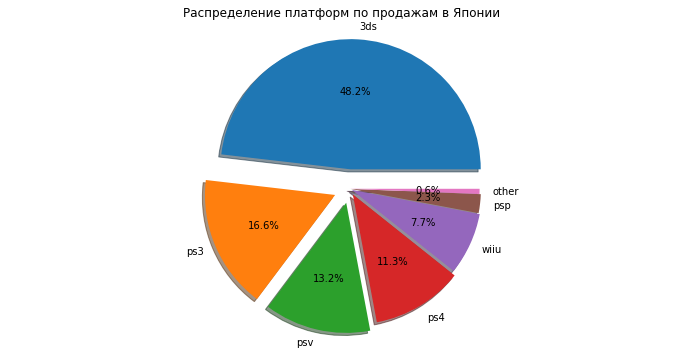

In [56]:
# NA
vals = na.values
labels = na.index
explode = (0.15, 0.12, 0.11, 0.05, 0.02, 0.01 , 0 , 0, 0)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение платформ по продажам в Северной Америке', fontsize=12)
plt.show()

# EU
vals = eu.values
labels = eu.index
explode = (0.15, 0.12, 0.11, 0.05, 0.02, 0.01 , 0 , 0)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение платформ по продажам в Европе', fontsize=12)
plt.show()

#JP
vals = jp.values
labels = jp.index
explode = (0.15, 0.12, 0.11, 0.05, 0.02, 0.01 , 0)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение платформ по продажам в Японии', fontsize=12)
plt.show()

#rotatelabels=True подпись перпендикулярно куску

**Распределение продаж по регионам среди топ-5 платформ за 2013 - 2016 годы**

**Северная Америка**<br>
Чуть более четверти продаж приходятся на `ps4`, примерно столько же на `xone`, немногим менее четверти на `x360`, чуть меньше одной седьмой на `ps3`, одна десятая на `3ds`. На `pc` приходится 2.5% от числа всех продаж в регионе. 

**Европа**<br>
Немногим более одной трети от числа всех продаж приодится на `ps4`, чуть менее четверти этой же платформе предыдущей серии `ps3`, далее чуть больше одной десятой на `xone`, одна десятая на `x360`, и чуть менее одной десятой на `3ds`. На `pc` приходится 6.5% от числа всех продаж.

**Япония**<br>
Продажи `3ds` - примерно половина от числа всех, около четверти - `ps3`,чуть больше одной десятой - `psv`, аналогиная доля - `ps4`, немногим менее одной десятой - `wiiu. 

### Топ-5 популярных жанров

Создадим списки топ-5 жанров по указанным регионам

In [57]:
top_na = df_forecast.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5) #убрав head(5) легко 
top_eu = df_forecast.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5) # получим полный список
top_jp = df_forecast.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5) # рейтинга жанров региона
print('Топ-5 популярных жанров NA\n', top_na.index.to_list(), '\n')
print('Топ-5 популярных жанров EU\n', top_eu.index.to_list(), '\n')
print('Топ-5 популярных жанров JP\n', top_jp.index.to_list(), '\n')

Топ-5 популярных жанров NA
 ['action', 'shooter', 'sports', 'role-playing', 'misc'] 

Топ-5 популярных жанров EU
 ['action', 'shooter', 'sports', 'role-playing', 'racing'] 

Топ-5 популярных жанров JP
 ['role-playing', 'action', 'misc', 'fighting', 'shooter'] 



Первые три места в Северной Америке и Европе полностью совпадают - action, shooter, sports. Заметим, что как и в случае с платформами Япония снова стоит особняком, первые три места - role-playing, action, misc. Action на первом месте в Северной Америке и Европпе, но на втором в Японии. На первом месте в Японии жанр role-playing, который в Америке и Европе занимает лишь 4 место. На последнем месте в указанных регионах различные жанры. В Америке - misc (третий в Японии!), в Европе - racing, в Японии - shooter. 

Отобразим распределение жанров по объему продаж на круговой диаграмме для каждого региона отдельно. Для этого подготовим данные.

In [58]:
all_gen_na = df_forecast.groupby('genre')['na_sales'].sum().sort_values(ascending=False) # Series жанр-продажи
all_gen_eu = df_forecast.groupby('genre')['eu_sales'].sum().sort_values(ascending=False) 
all_gen_jp = df_forecast.groupby('genre')['jp_sales'].sum().sort_values(ascending=False) 

all_gen_na = pd.DataFrame(all_gen_na)
all_gen_na.reset_index(level=0, inplace=True) # обернули в датафрей для дальнейшего перобразования значений столбца

all_gen_eu = pd.DataFrame(all_gen_eu)
all_gen_eu.reset_index(level=0, inplace=True)

all_gen_jp = pd.DataFrame(all_gen_jp)
all_gen_jp.reset_index(level=0, inplace=True)

all_gen_na.loc[all_gen_na['genre']
                .isin(['strategy', 'puzzle']), 'genre'] = 'other' # заменили название жанров из tail списка на other
all_gen_eu.loc[all_gen_eu['genre']
                .isin(['strategy', 'puzzle']), 'genre'] = 'other'
all_gen_jp.loc[all_gen_jp['genre']
                .isin(['strategy', 'puzzle']), 'genre'] = 'other'

na = all_gen_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False) #  создали соотвествующие series
eu = all_gen_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp = all_gen_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

eu

genre
action          118.13
shooter          87.86
sports           60.52
role-playing     36.97
racing           20.19
misc             20.04
platform         15.58
simulation       10.92
fighting          8.55
adventure         8.25
other             5.22
Name: eu_sales, dtype: float64

Готово. Можно строить диаграммы.

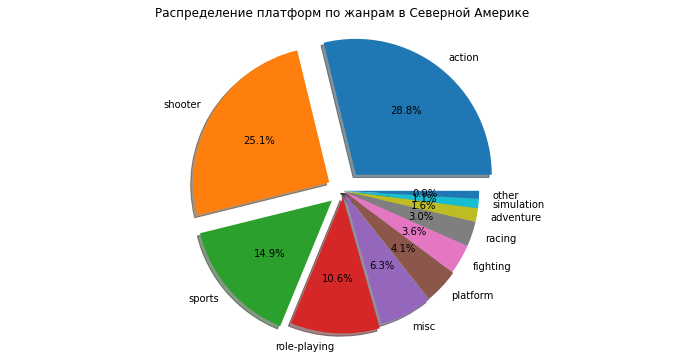

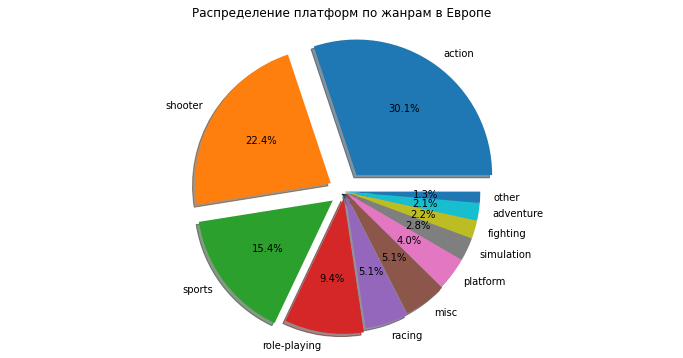

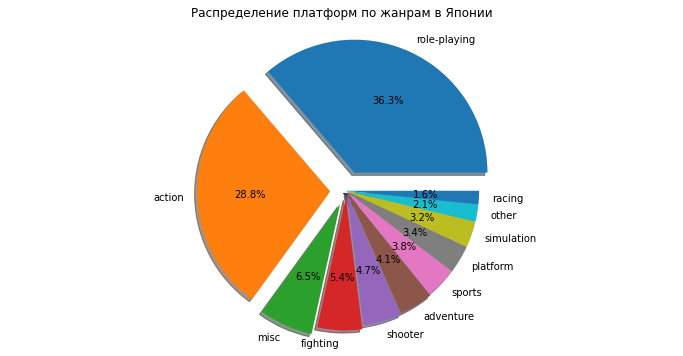

In [59]:
# NA
vals = na.values
labels = na.index
explode = (0.15, 0.12, 0.11, 0.05, 0.02, 0.01 , 0 , 0, 0, 0, 0)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение платформ по жанрам в Северной Америке', fontsize=12)
plt.show()

# EU
vals = eu.values
labels = eu.index
explode = (0.15, 0.12, 0.11, 0.05, 0.02, 0.01 , 0 , 0, 0, 0, 0)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение платформ по жанрам в Европе', fontsize=12)
plt.show()

#JP
vals = jp.values
labels = jp.index
explode = (0.15, 0.12, 0.11, 0.05, 0.02, 0.01 , 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение платформ по жанрам в Японии', fontsize=12)
plt.show()

#rotatelabels=True подпись перпендикулярно куску

**Распределение продаж по регионам среди топ-5 жанров за 2013 - 2016 годы**

**Северная Америка**
Чуть более одной трети продаж приходится на жанр action, одна четверть на shooter, чуть более одной десятой sports, одна десятая role-playing и менее одной пятнадцатой на misc

**Европа**
Немногим более одной трети приходится на action, чуть больше четверти на shooter, чуть более одной десятой на sports, одна десятая на role-playing и одна двадцатая на racing.

**Япония**
Немногим более одной трети от всех продаж приходится на жанр role-playing, одна треть на action, чуть менее одной пятнадцатой на misc, примерно одна двадцатая fighting и и чуть менее одной двадцатой на shooter.


### Влияние рейтинга ESRB на продажи в отдельных регионах

In [60]:
rating = df_forecast.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].apply(sum).sort_values(by='na_sales', ascending=False).reset_index()
rating

,rating,na_sales,eu_sales,jp_sales
0,m,172.82,153.71,14.72
1,e,81.66,85.44,15.98
2,other,74.82,64.15,80.97
3,e10+,56.43,45.25,6.27
4,t,51.98,43.68,22.84


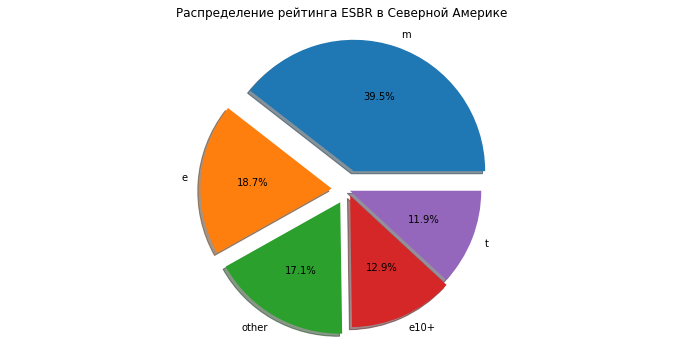

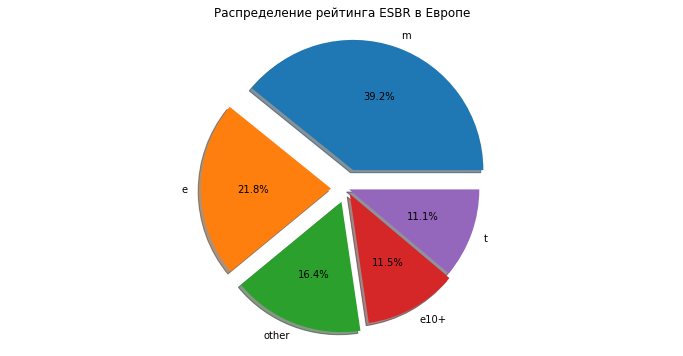

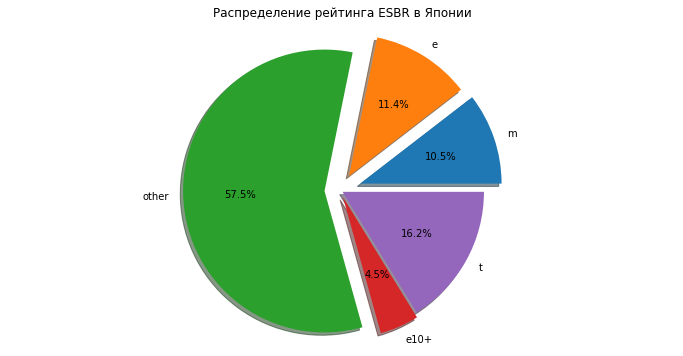

In [61]:
# NA
vals = rating['na_sales']
labels = rating['rating']
explode = (0.15, 0.12, 0.11, 0.05, 0.02)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение рейтинга ESBR в Северной Америке', fontsize=12)
plt.show()

# EU
vals = rating['eu_sales']
labels = rating['rating']
explode = (0.15, 0.12, 0.11, 0.05, 0.02)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение рейтинга ESBR в Европе', fontsize=12)
plt.show()

#JP
vals = rating['jp_sales']
labels = rating['rating']
explode = (0.15, 0.12, 0.11, 0.05, 0.02)
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax.axis("equal")
ax.set_title('Распределение рейтинга ESBR в Японии', fontsize=12)
plt.show()

#rotatelabels=True подпись перпендикулярно куску

Из диаграм выше видим, что распределение рейтингов в Северной Америке и Евпропе очень похожи. M составляет примерно 2/5 от числа всех, 1/4 - Е, 1/4 - Other (отсутствие рейтинга), примерно 1/10 - Е10+ и 1/10 - Т.

Совсем иначе дела обстоят в Японии. Там на первом месте с большим отрывом, примерно 2/3 от числа всех - Other (отсутствие рейтинга), около 1/4 - Т, по 1/10 - М и Е, чуть менее 1/20 - Е10+.

**ВЫВОД**

В ходе исследования мы составили следующие портреты пользователей каждого из регионов:

<br>**Северная Америка**
* Любимая платформа **ps4**, но и **xone** или **x360** тоже в фаворитах.
* Топ-3 из числа предпочитаемых гровых жанров - **action**, **shooter**, **sports**
* Нелюбимый жанр из всех - **puzzle**, из топ-5  - **misc**
* Наибольшее предпочтение отдает играм рейтинга E (для всех).

<br>**Европа**
* Любимая платформа **ps4**, **ps3** на втором месте.
* Топ-3 из числа предпочитаемых игровых жанров полностью совпадает с аналогичным у "северо-американца"
* Нелюбимый жанр из всех - **puzzle**, из топ-5  - **racing**
* Наибольшее предпочтение отдает играм рейтинга E (для всех).

<br>**Япония**
* Любимая платформа **3ds**, **ps3** и **psv** на втором и третьем местах соотвественно, но с приличным отстованием.
* Топ-3 из числа предпочитаемых гровых жанров - **role-playing**, **action**, **misc**
* Нелюбимый жанр из всех - **puzzle**, из топ-5  - **shooter**
* Наибольшее предпочтение отдает играм без рейтинга.

## Проверка гипотез

Проверим две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Гипотеза №1**

Сформулируем нулевую и альтернативную гипотезы

**Нулевая гипотеза H_0**<br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза H_1**<br>
Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы возьмем актуальные данные (2013 - 2016 годы), не содержащие пропуски в столбце user_score.

In [62]:
df_test = df_games[(df_games['year_of_release'] >= 2013) & (df_games['user_score'].isnull() == False)].reset_index(drop=True)
df_test.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
2,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
3,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,m,10.24
4,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71.0,2.6,m,9.36


Значит наша задача к сравнению средних двух выборок с разными дисперсиями и логично использовать scipy.stats.ttest_ind. Рассчитаем дисперсию выборок, для понимания того, какое значение передать в equal_var (False или True).

In [63]:

xbox1 = df_test[df_test['platform']=='xone']['user_score']
pc = df_test[df_test['platform']=='pc']['user_score']

xbox1_var = np.var(xbox1, ddof=1)
pc_var = np.var(pc, ddof=1)

print('Дисперсия платформы Xbox One:', round(xbox1_var, 2))
print()
print('Дисперсия платформы PC:', round(pc_var, 2))



Дисперсия платформы Xbox One: 1.91

Дисперсия платформы PC: 3.04


Разница дисперсий 1.13, значит дисперсии выборок нельзя считать равными, значит передадим параметру egual_var значение False. 

In [64]:
alpha = 0.05 # уровень значимости в 5% достаточный

results = st.ttest_ind(xbox1, pc, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученный результат (р-уровень значимости почти 15% при допуске в 5%) говорит о том, что мы не можем отвергать нулевую гипотезу. И можем ситать, что **средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются**.


**Гипотеза №2**

Сформулируем нулевую и альтернативную гипотезы

**Нулевая гипотеза H_0**<br>
Средние пользовательские рейтинги жанров action и sports одинаковые

**Альтернативная гипотеза H_1**<br>
Средние пользовательские рейтинги жанров action и sports разные

In [65]:

action = df_test[df_test['genre']=='action']['user_score']
sports = df_test[df_test['genre']=='sports']['user_score']

action_var = np.var(action, ddof=1)
sports_var = np.var(sports, ddof=1)

print('Дисперсия жанра action:', round(action_var, 2))
print()
print('Дисперсия жанра sports:', round(sports_var, 2))

Дисперсия жанра action: 1.77

Дисперсия жанра sports: 3.18


Аналогично, исходя из техже целей и полученной разницы в дисперсиях выборок будем использовать t-test, где параметру egual_var значение False.

In [66]:
alpha = 0.05 # уровень значимости в 5% достаточный

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


Полученный результат говорит о том, что средние пользовательские оценки  жанров action и sports статистически значимо различаются

**ВЫВОДЫ**

Используя t-test с  egual_var == False и уровнем значимости 5% проверили две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Полученный результаты говорит о том, что средние пользовательские рейтинги платформ Microsoft Xbox One и PC статистически значимо не отличаются, а вот средние пользовательские рейтинги жанров action и sports напротив, статистически значимо различаются.

## Общий вывод

В нашем распоряжении были данные о продажах игр с 1980 по 2016 годы, предоставленные отделом продаж интернет-магазина "Стримчик". 

Целью исследования было **выявить определяющие успешность игры закономерности, чтобы по данным предыдущего года, мы могли прогнозировать продажи в слеующем году**. В частности нас интересовал прогноз на 2017 год. 

Понимая тенденции рынка видеоигр, роста падения спроса на ту или иную платформу, игровой жанр можно с большей уверенностью осуществлять инвестиции по указанным направлениям и корректировать рекламные компании, делая ставку на потенциально популярный, а значит потенциально прибыльный продукт.

В ходе исследования были выполнены:<br>
**1. Обзор данных**


**2. Предобработка данных**
* Изменили тип данных столбцов `year_of_release` и `user_score`, обработали значение `TBD` последнего; 
* Заменили часть пропусков в столбце `rating`, остальные пропуски не трогали;
* Добавили новый столбец `sales` с сумарными продажами по всем регионам.

**3. Исследовательский анализ данных**
* Рассмотрели динамику релизов новых игр  с 1980 по 2016. Отметили малую активность на рынке до 1994 года, далее увереннй рост до 1998 года, небольшой спад и снова скачек в 2002 и уверенный рост до 2008 года. Далее мировой фиансовый кризис и затем плавный и далее резкий спад к 2012 году (игры на смартфонах завоевали рынок) и выход на показатели 2001 года в 2016. 

*Все это подтверждает связь рынка видеоигр с мировыми экономическими процессами с одной стороны, и показывает как он может стремительно меняться из-за появления и популяризации новых технологий (так было с выходом Sony PlayStation, Iphone и AppStore, с завоеванием рынка мобильных телефонов смартфонами).*
* Выявили абсолютных лидеров по продажам среди платформ за все время: **ps2, x360, ps3, wii, ds, ps, gba, ps4, psp, pc**;


* Определили характерный срок, за который появляются новые и исчезают старые платформы - 10.6 лет.

*Далее рассматривали данные за 2013 - 2016 годы, как актуальные для построения прогноза на 2017.*

* Определили 3 перспективные платформы:

1. `Sony PlayStation 4`;
2. `Microsoft Xbox One`; 
3. `PC (personal computer)`;

* Рассмотрели влияние отзывов критиков и пользователей на продажи ps4 как одной из самых популярных в 2013 - 2016 годах платформы. Заметили, что наибольшие продажи у игр с высокими оценками критиков. Оценки пользователей на продажи не влияют;


* Рассмотрели влияние оценок критиков и пользователей на продажи среди топ-7 популярных платформ. Заметили, что продажи среди топ-7 популярных в 2013 - 2016 годах платформ зависят от оценок критиков, чем выше оценка тем выше продажи. Оценки пользователей слабо влияют на продажи среди топ-7 платформ. Есть как хорошо продающиеся игры с высокими оценками, так и с низкими;


* Изучили распределение игр по жанрам в период с 2013 по 2016 годы. В топ-5, по количеству выпущенных игр в этом жанре, попали action, role-playing, adventure, sports и shooter. В топ-5 по продажам попали action, shooter, sports, role-playing, misc;

**4. Портрет пользователя каждого региона**

*Северная Америка*

В топ-3 платформ вошли: **ps4, xone, x360.**<br>
Топ-3 из числа предпочитаемых гровых жанров - **action, shooter, sports**.<br>
Наибольшее предпочтение отдает играм рейтинга **E (для всех).**

*Европа*

В топ-3 платформ вошли:  **ps4, ps3, xone.**<br>
Топ-3 из числа предпочитаемых гровых жанров - **action, shooter, sports.**<br>
Наибольшее предпочтение отдает играм рейтинга **E (для всех).**

*Япония*

В топ-3 платформ вошли: **3ds, ps3, psv.**<br>
Топ-3 из числа предпочитаемых гровых жанров - **role-playing, action, misc.**<br>
Наибольшее предпочтение отдает играм **без рейтинга ESBR**.

**5. Провека гипотез**

Проверили две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*Средние пользовательские рейтинги платформ Microsoft Xbox One и PC статистически значимо не отличаются*<br>
*Cредние пользовательские рейтинги жанров action и sports напротив, статистически значимо различаются.*

**Резюмируя результаты исследования, можно смело утверждать, что успешность игры определяется:**
1. *Жанром*, в нашем случае это **shooter, sports, role_playing**;
2. *Платформой* на, которой она выходит. В нашем случае это **Sony PlayStation 4, Microsoft Xbox One, Nintendo 3DS, Nintendo Wii U**;
3. *Спецификой предпочтений пользователей региона*, в котором выходит игра;
4. *Рейтингом ESRB*, в нашем случае это **Е, Т, отсутствие рейтинга ESBR**;
5. *Оценками критиков* игры в первую очередь, и уже потом, не во всех случаях, оценками пользователей.